In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

In [38]:
#Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Finance Related options
import yfinance as yf
from yfinance import data

In [4]:
# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [5]:
#Load Data
df= pd.read_csv(r'C:\Users\Hp\Downloads\archive\2014_Financial_Data.csv', index_col=0)

In [6]:
#Drop rows with no information
df.dropna(how='all', inplace=True)

In [7]:
#Get info about the dataset
df.info()
#describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, PG to WTT
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 6.5+ MB


Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  3.764000e+03     3572.000000     3.734000e+03  3.756000e+03   
mean   5.879050e+09       12.954244     3.700973e+09  2.188214e+09   
std    3.901741e+10      705.605473     3.040688e+10  1.159028e+10   
min   -6.276160e+08       -1.773200    -5.455740e+08 -1.105000e+09   
25%    5.788880e+07       -0.002350     3.135714e+06  3.092900e+07   
50%    4.349010e+08        0.061850     1.414420e+08  1.908760e+08   
75%    2.393625e+09        0.188875     1.199844e+09  8.922534e+08   
max    1.824698e+12    42138.663900     1.537249e+12  4.621600e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  3.672000e+03  3.749000e+03        3.745000e+03      3.753000e+03   
mean   9.401830e+07  9.307406e+08        1.438144e+09      6.748248e+08   
std    6.408912e+08  4.820928e+09        7.305171e+09      3.786291e+09   
min   -1.500000e+05  0.000000e+00       -1.088448e+09     -6.786000e+09   
25%    0.000000e+00  1.548900e+07        3.106600e+07     -1.308000e+06   
50%    0.000000e+00  7.381800e+07        1.386610e+08      4.104400e+07   
75%    9.911000e+06  3.510000e+08        5.885100e+08      2.712980e+08   
max    1.153700e+10  1.856830e+11        3.056050e+11      1.565540e+11   

       Interest Expense  Earnings before Tax  ...  \
count      3.745000e+03         3.728000e+03  ...   
mean       1.002018e+08         5.725866e+08  ...   
std        6.991091e+08         2.793740e+09  ...   
min       -2.250000e+08        -8.878000e+09  ...   
25%        0.000000e+00        -3.732902e+06  ...   
50%        2.563000e+06         2.842700e+07  ...   
75%        4.300000e+07         2.193835e+08  ...   
max        3.152300e+10         8.720500e+10  ...   

       3Y Dividend per Share Growth (per Share)  Receivables growth  \
count                               3208.000000         3518.000000   
mean                                   0.036206            4.445793   
std                                    0.259765          161.135098   
min                                   -1.000000           -1.000000   
25%                                    0.000000           -0.045800   
50%                                    0.000000            0.014250   
75%                                    0.044000            0.205475   
max                                    3.605800         9328.200000   

       Inventory Growth  Asset Growth  Book Value per Share Growth  \
count       3518.000000   3518.000000                  3439.000000   
mean           0.164692      2.279999                     0.813931   
std            2.195115     92.428920                    25.630214   
min           -1.000000     -0.979600                  -230.000000   
25%            0.000000     -0.015400                    -0.084550   
50%            0.000000      0.062200                     0.037100   
75%            0.063850      0.217100                     0.141900   
max           76.625000   5468.426400                  1360.125000   

       Debt Growth  R&D Expense Growth  SG&A Expenses Growth  \
count  3506.000000         3561.000000           3565.000000   
mean      1.361780            0.596529              0.382284   
std      18.734301           25.894049              4.696975   
min      -1.051000           -1.043700             -1.000000   
25%      -0.048200            0.000000             -0.003900   
50%       0.000000            0.000000              0.068800   
75%       0.210300            0.004700              0.220500   
max     729.576600         1542.611000            225.690000   

       2015 PRICE VAR [%]        Class  
count        3.808000e+03  3808.000000  
mean         9.751560e+02     0.429097  
std          4.098461e+04     0.495012  
min         -1.003972e+02     0.000000  
25%         -2.857143e+01     0.000000  
50%         -5.281842e+00     0.000000  
75%          1.331484e+01     1.000000  
max          2.418601e+06     1.000000  

[8 rows x

<AxesSubplot:title={'center':'CLASS COUNT'}, xlabel='Count', ylabel='Class'>

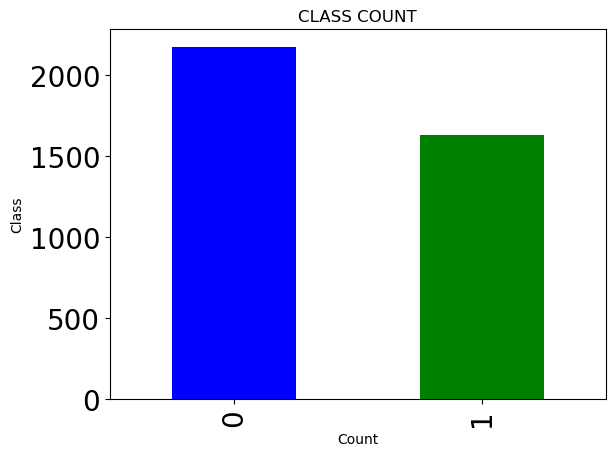

In [8]:
#plot class distribution
df_class= df['Class'].value_counts()
colors = ['blue', 'green']
df_class.plot(kind='bar', title='CLASS COUNT', fontsize=20, xlabel='Count', ylabel='Class', color=colors)


<AxesSubplot:title={'center':'SECTOR COUNT'}, ylabel='Sectors'>

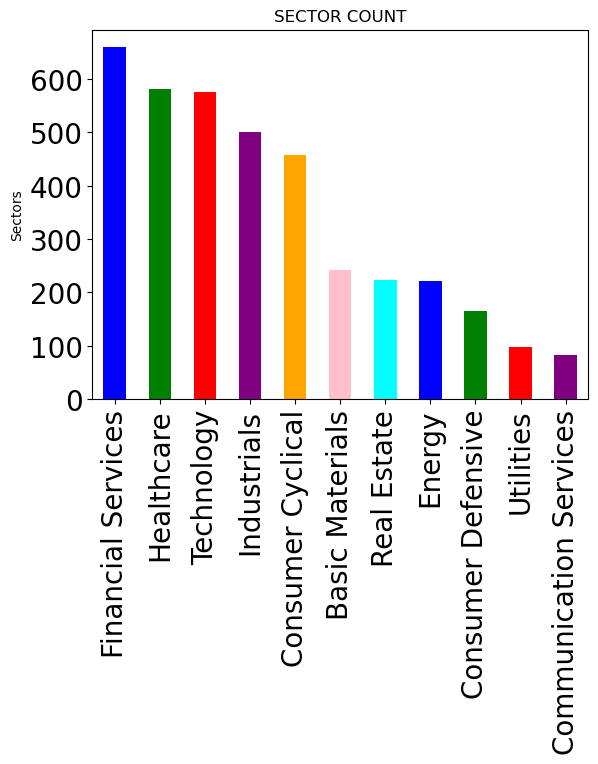

In [9]:
#plot sector distribution
df_sector=df['Sector'].value_counts()
colors=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan']
df_sector.plot(kind='bar', title= 'SECTOR COUNT', fontsize= 20, ylabel='Sectors', color=colors)

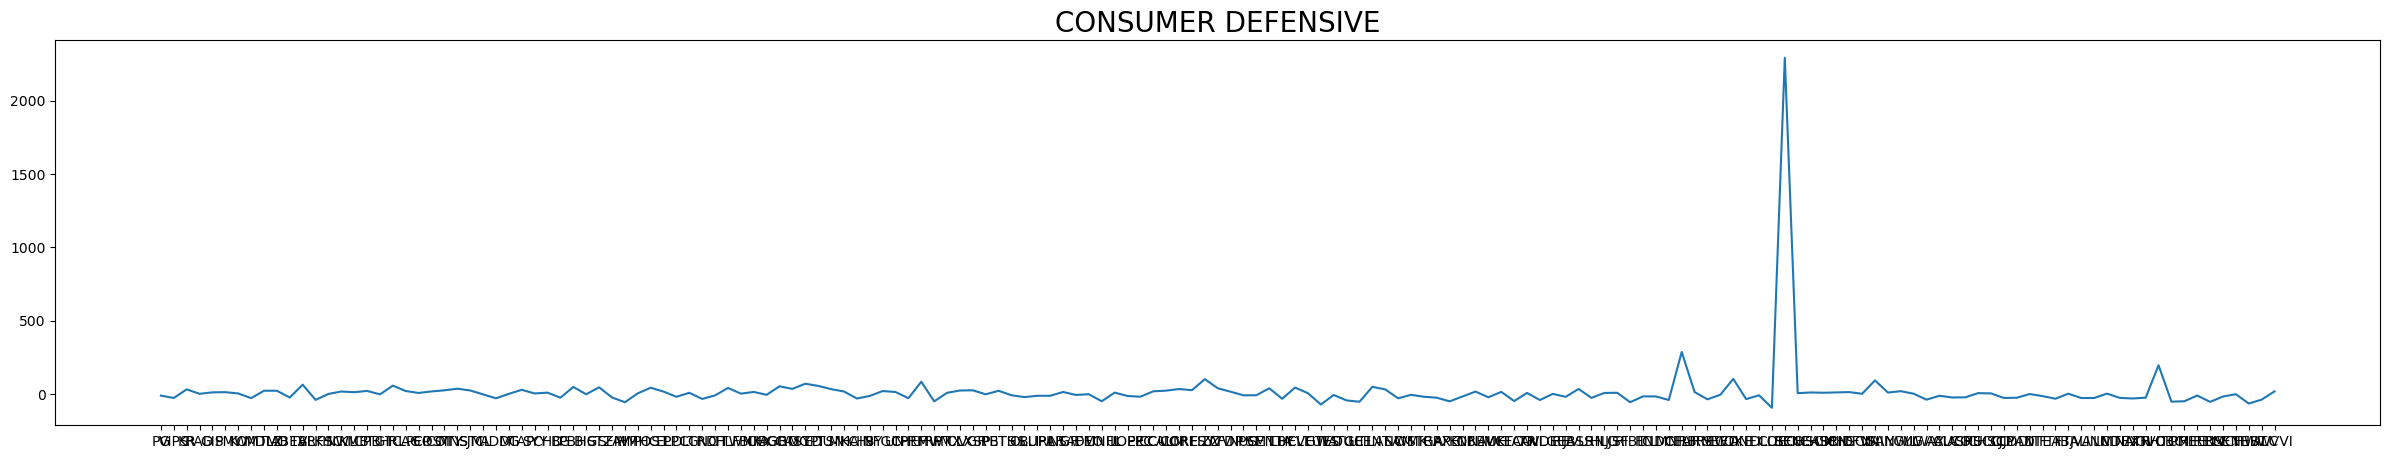

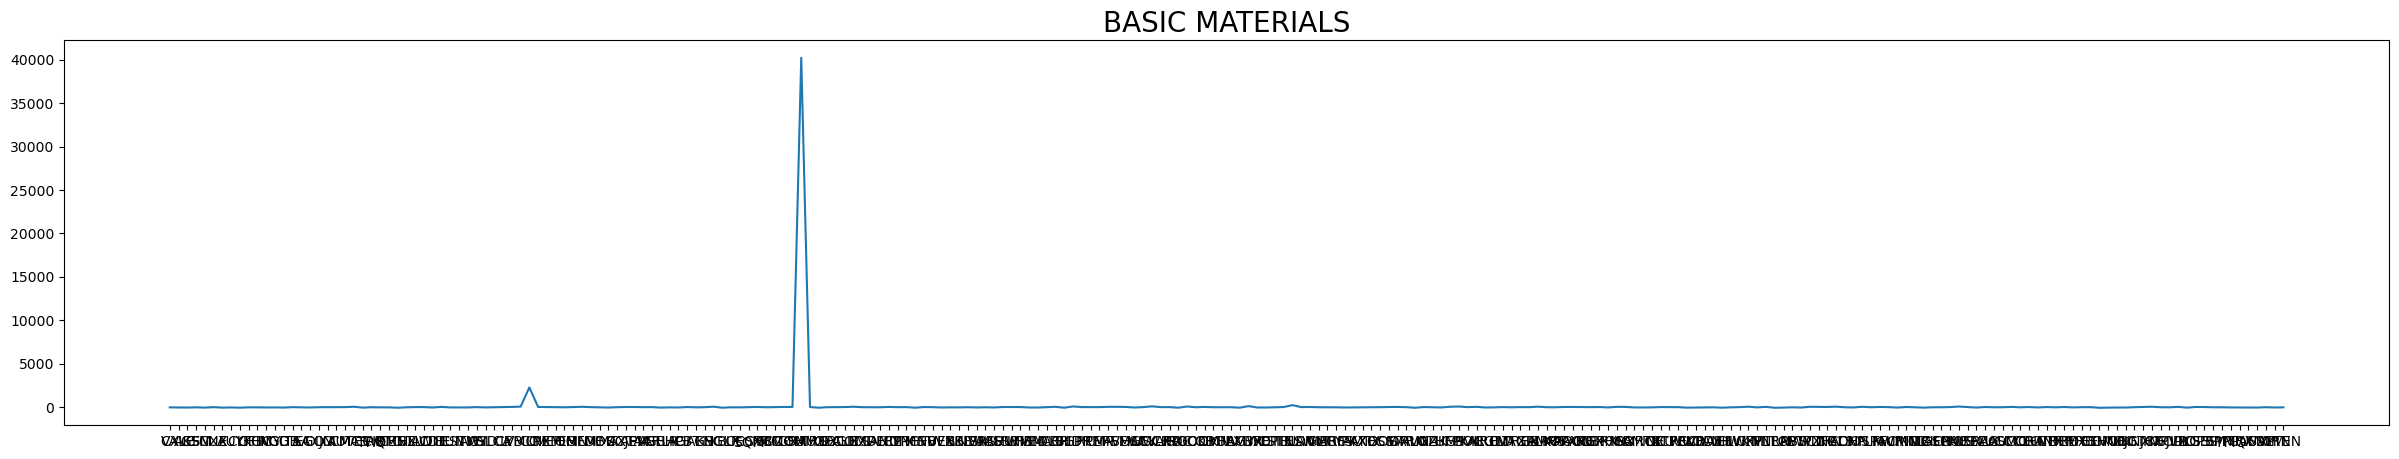

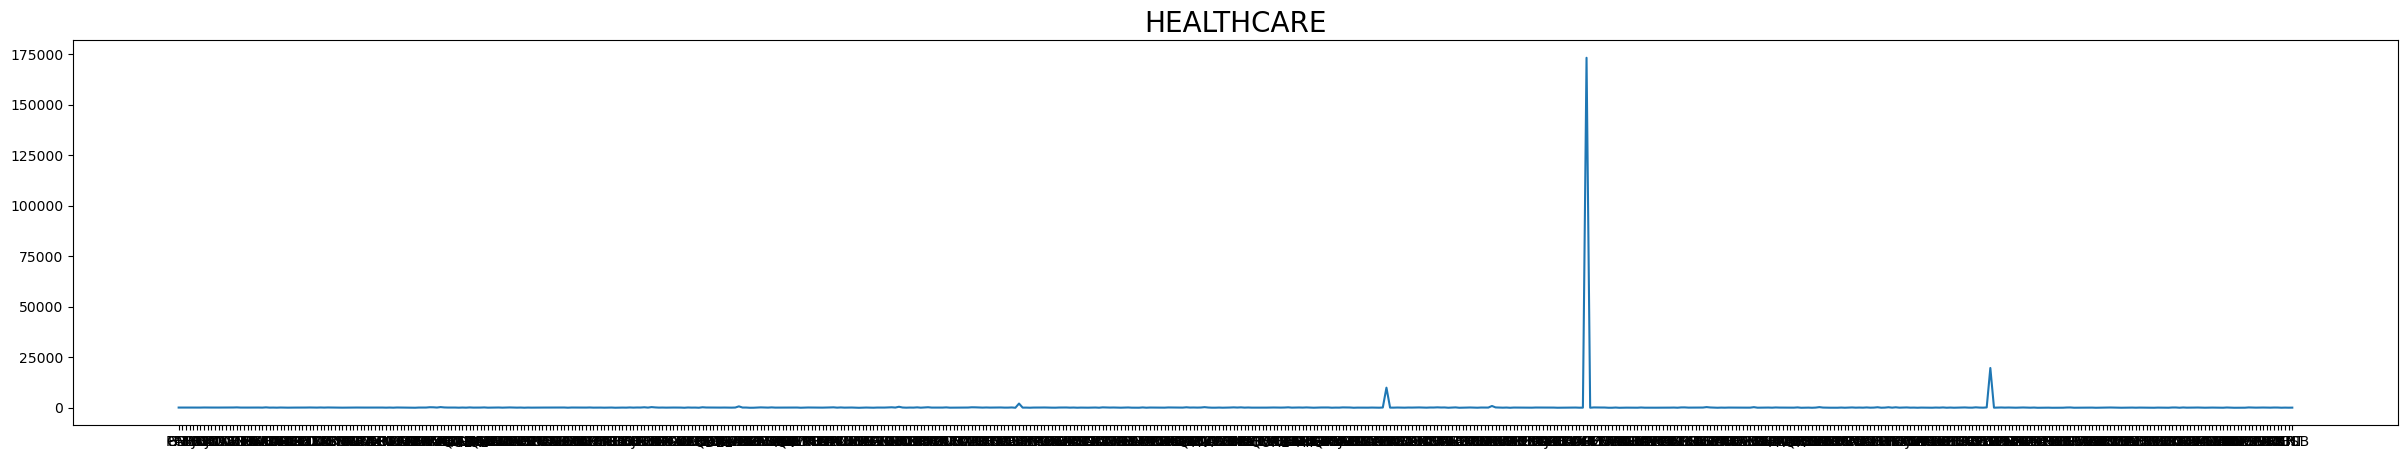

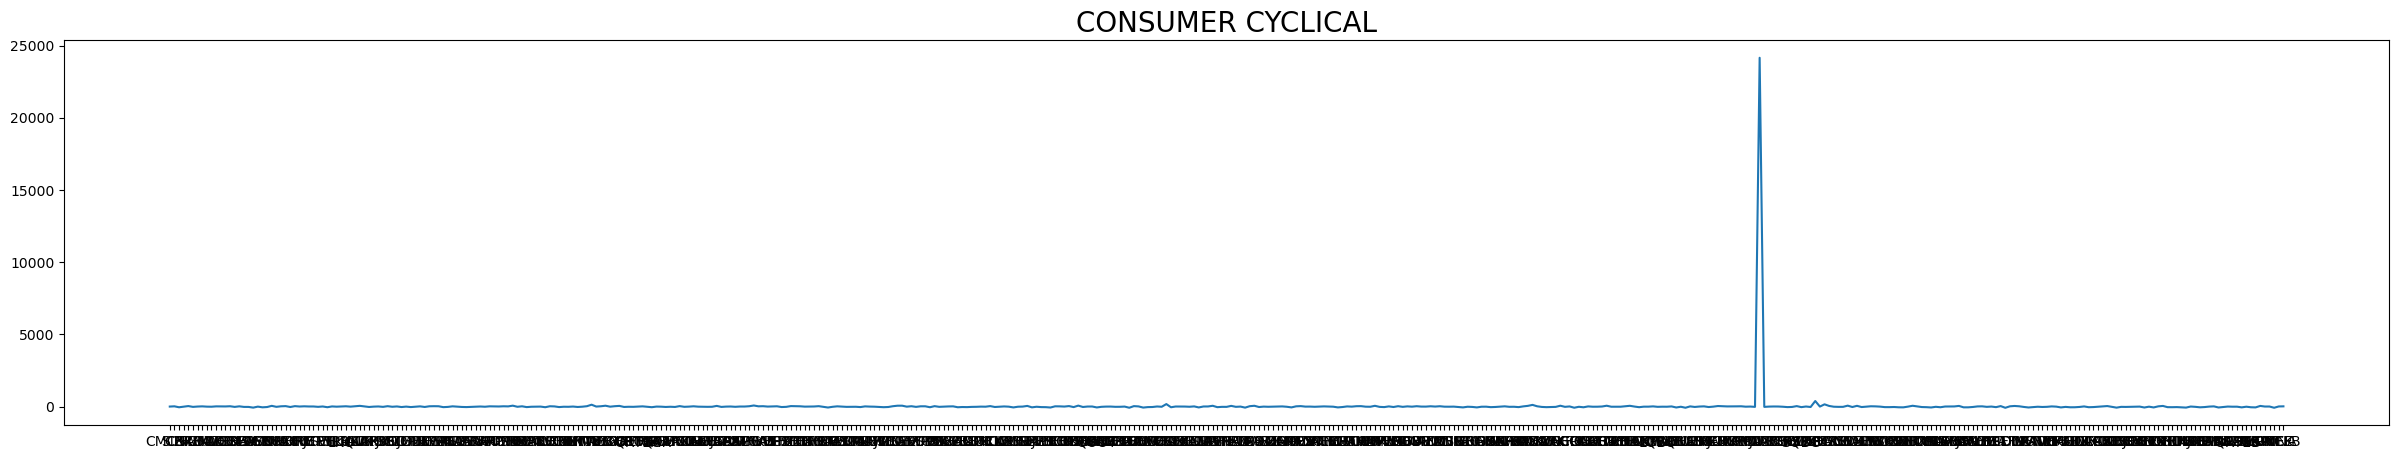

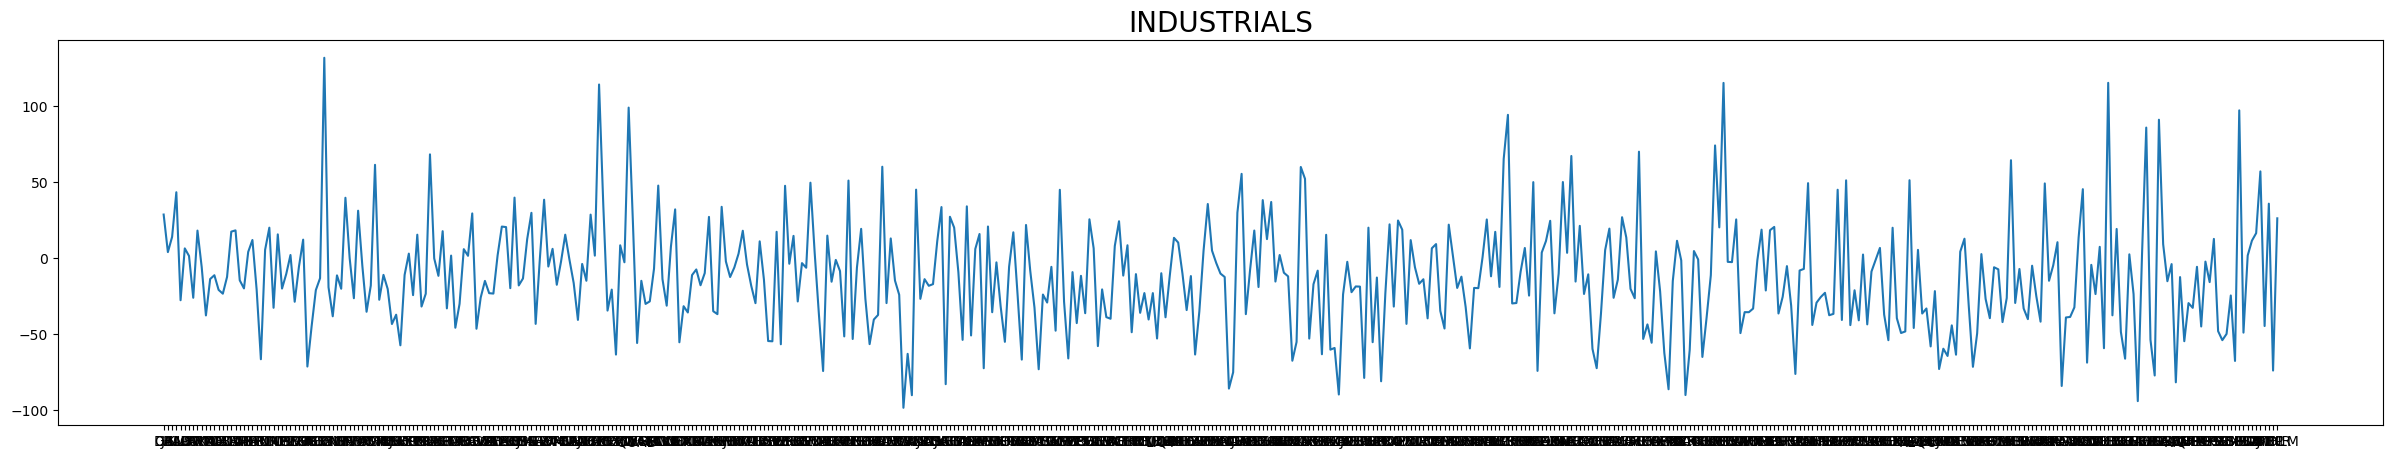

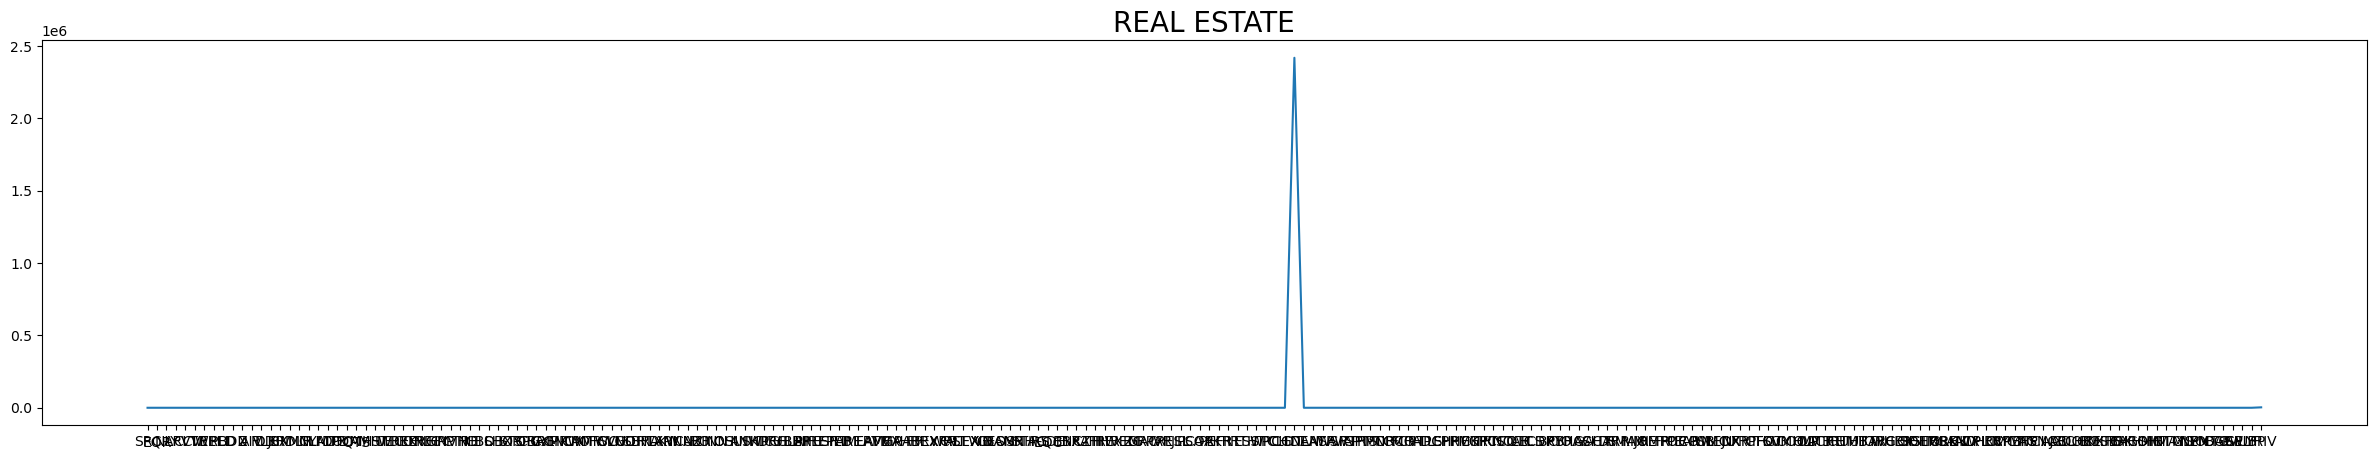

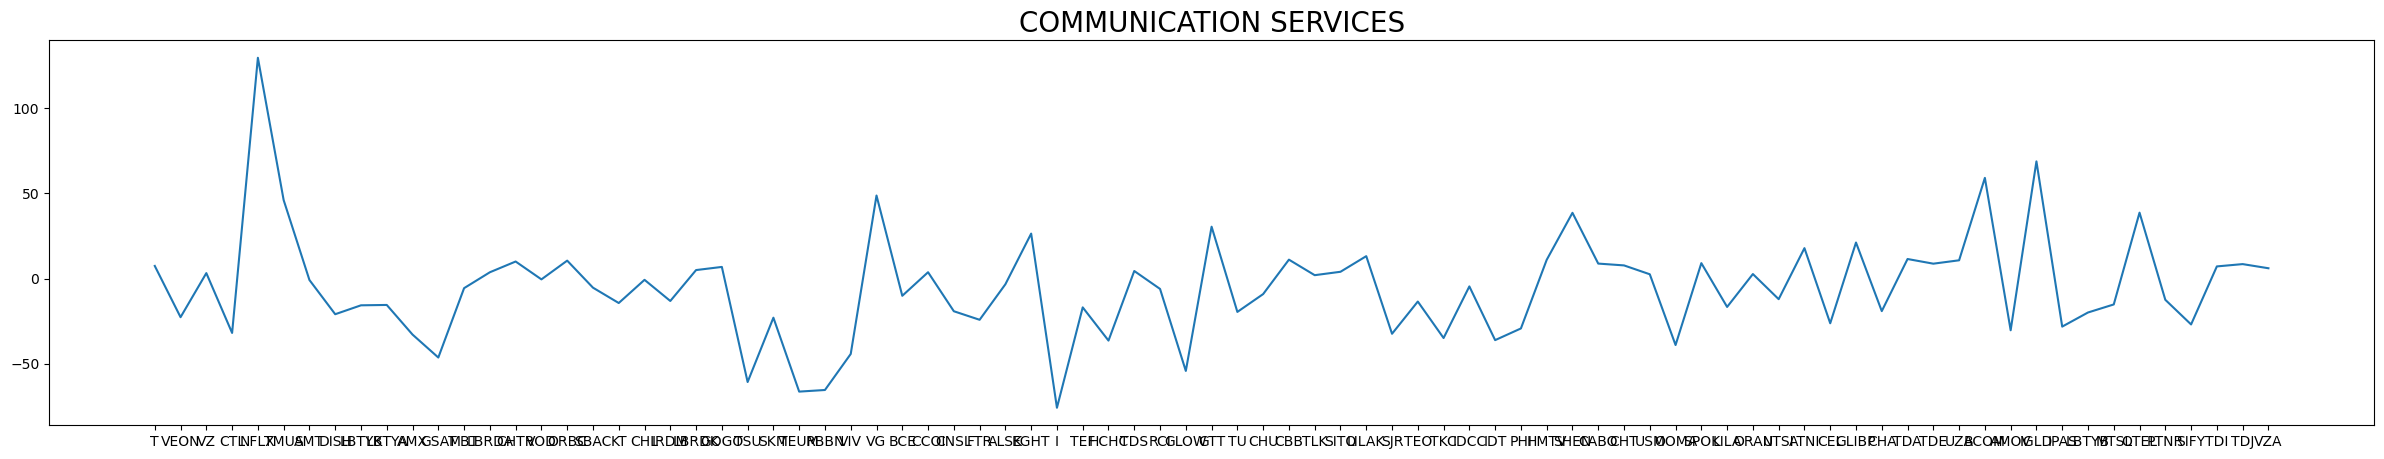

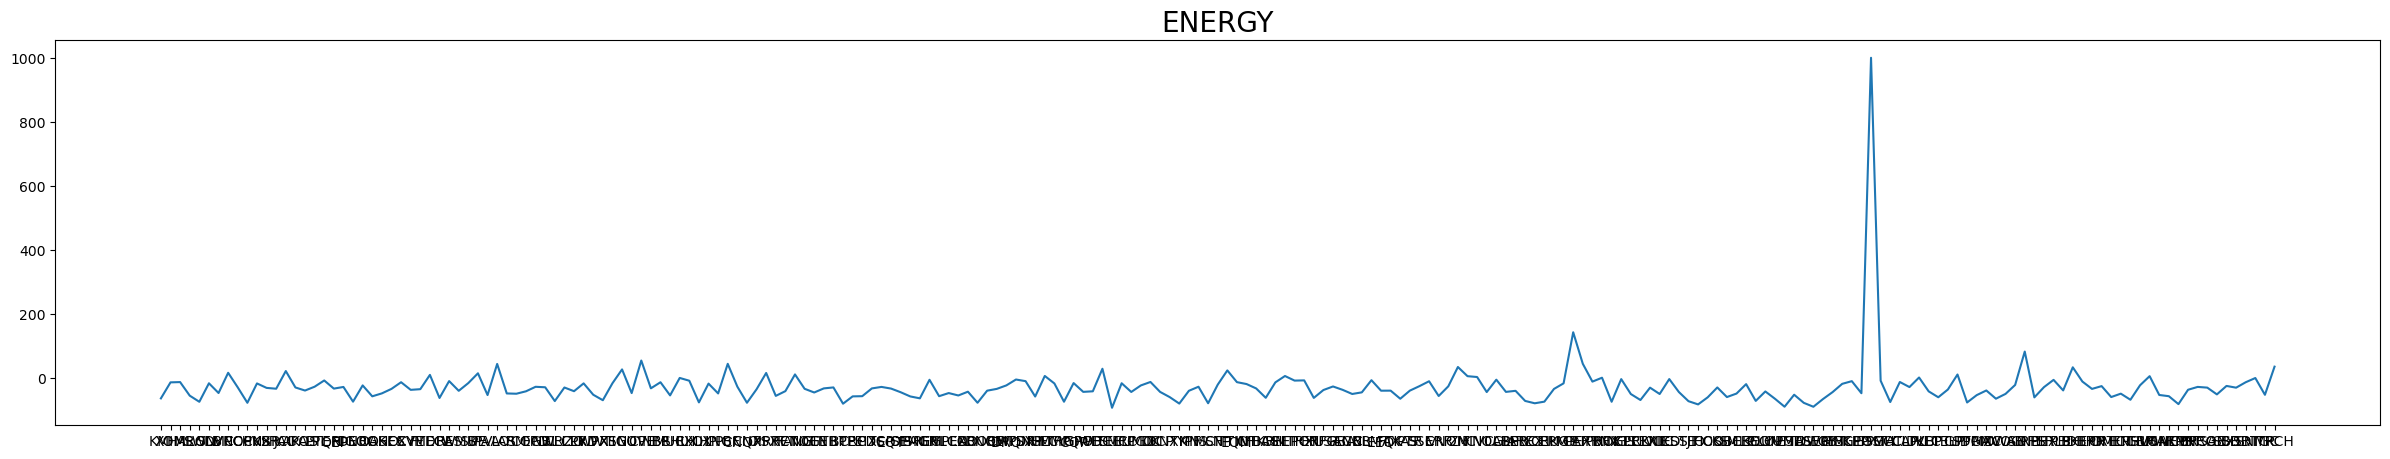

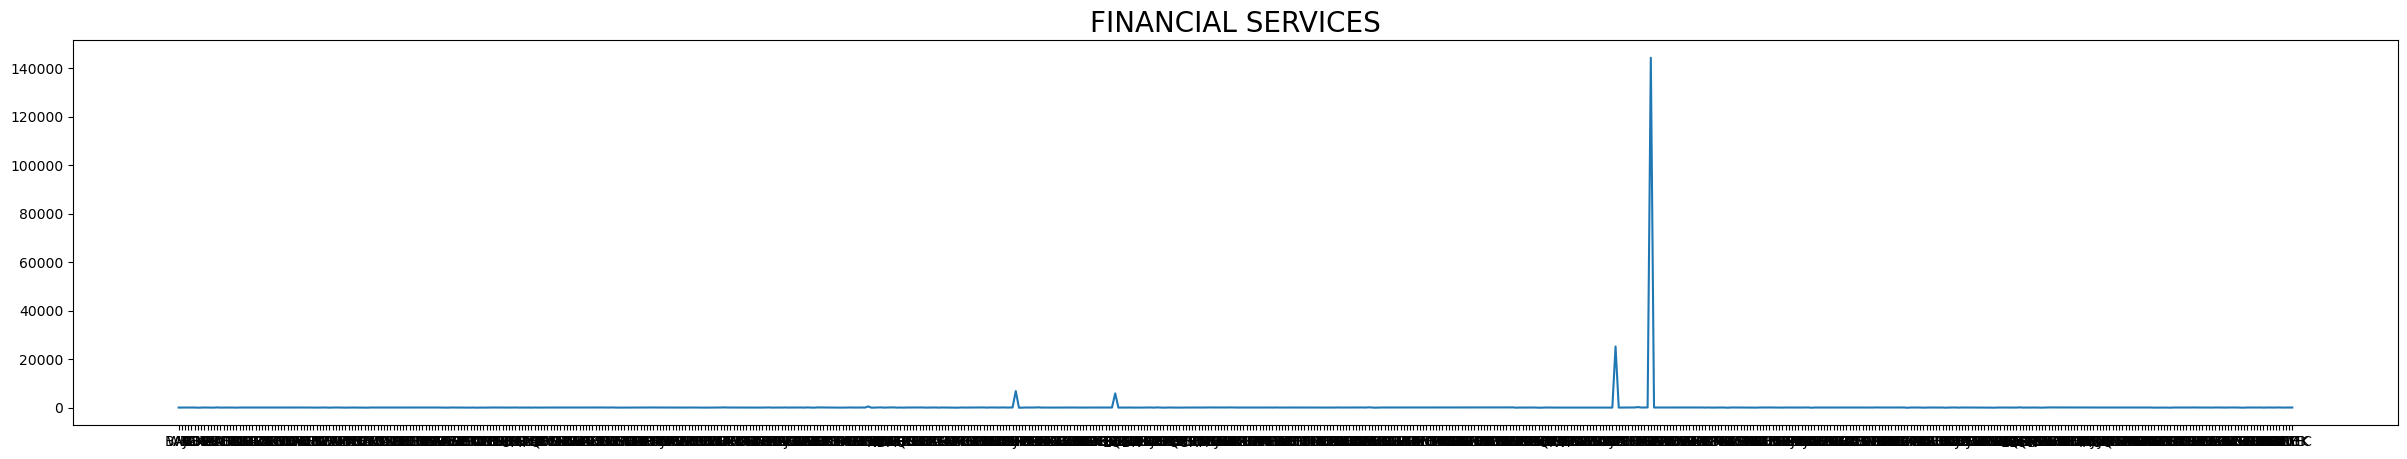

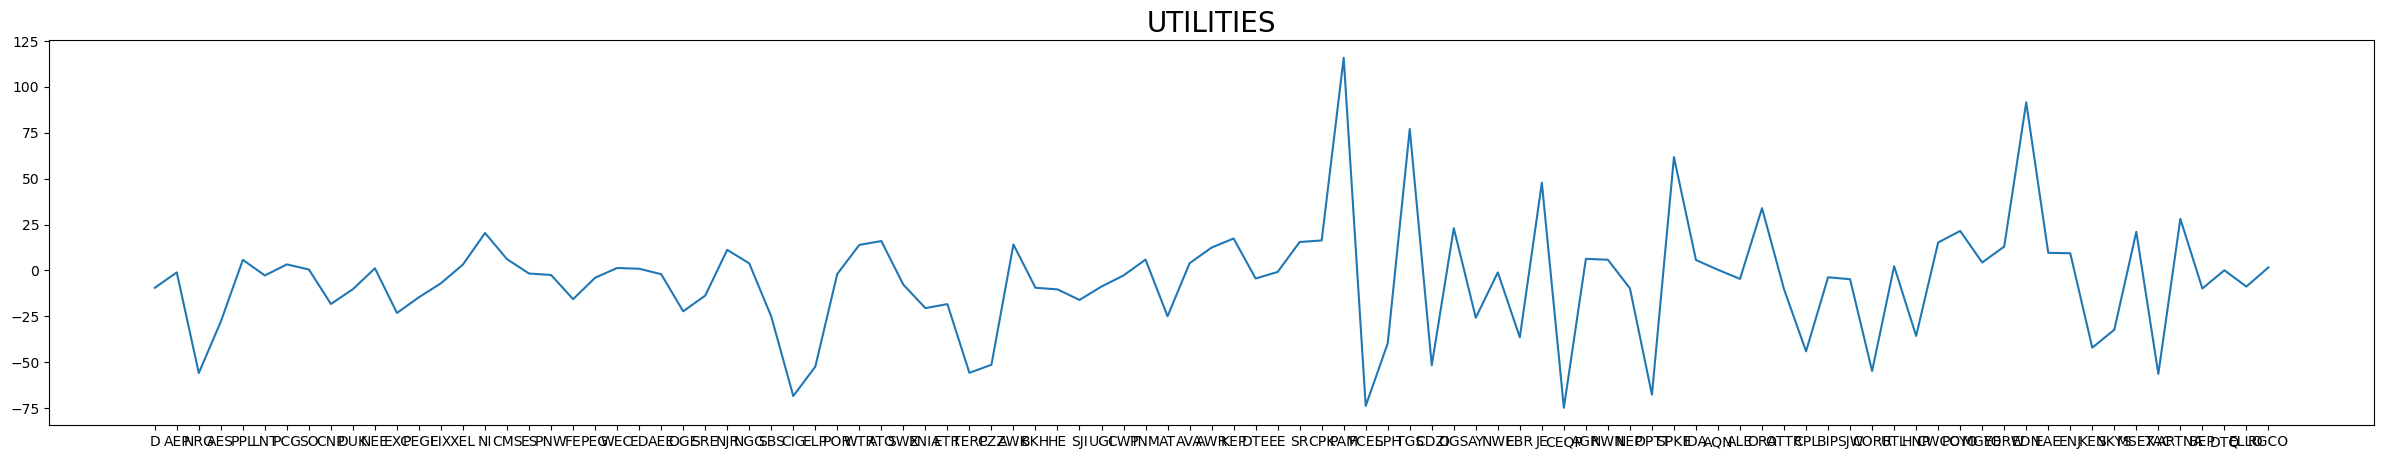

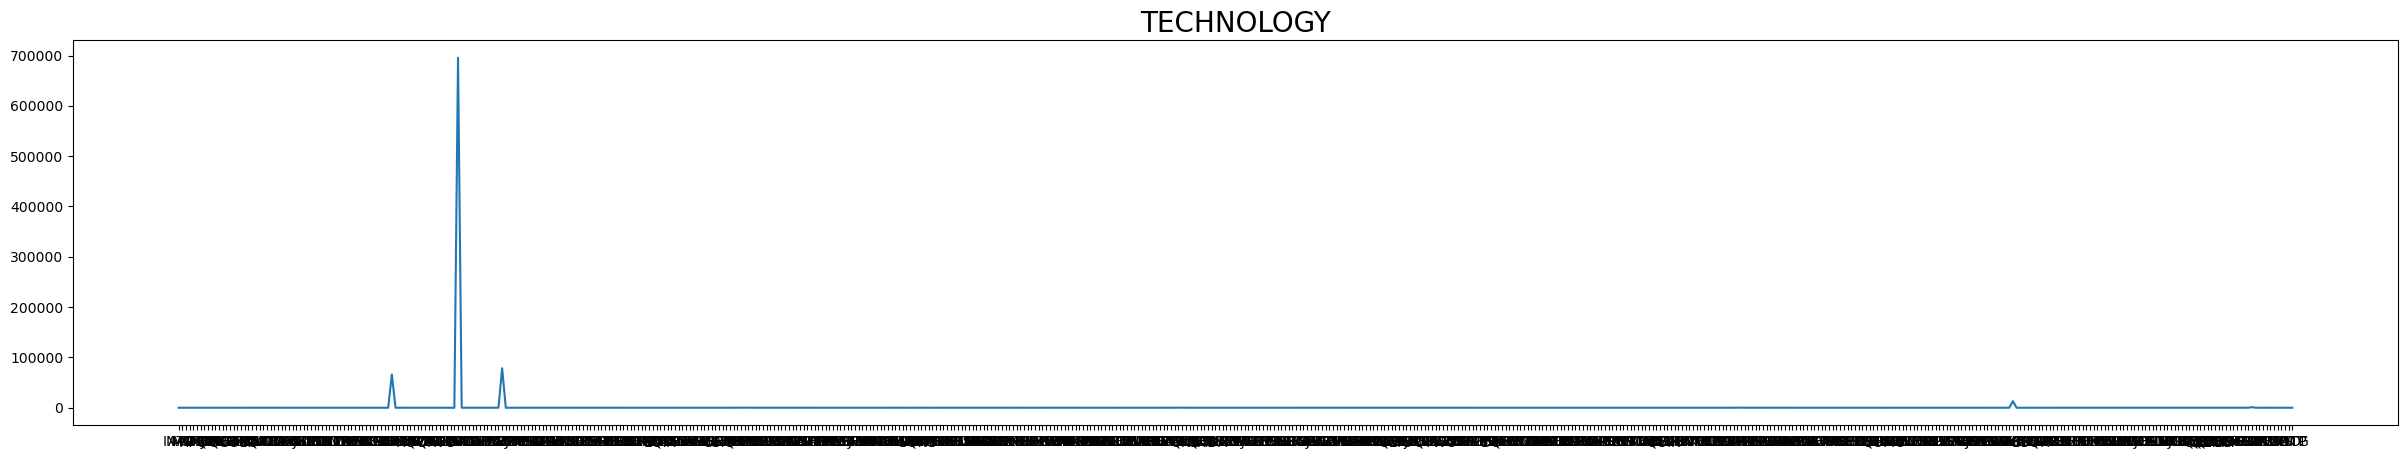

In [10]:
#Checking the price variation, looking for outliers
#Extract the columns we need in this step from the data frame
df_=df.loc[:,['Sector','2015 PRICE VAR [%]']]
#Get a list of sectors
sector_list=df_['Sector'].unique()
#Plot the price variation for each sector
for sector in sector_list:
    temp=df_[df_['Sector']==sector]
    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(),fontsize=20)
    plt.show()

22 STOCKS with more than 500% gain.



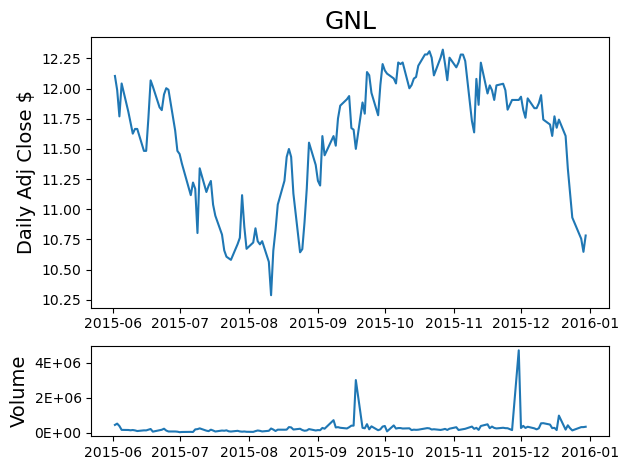

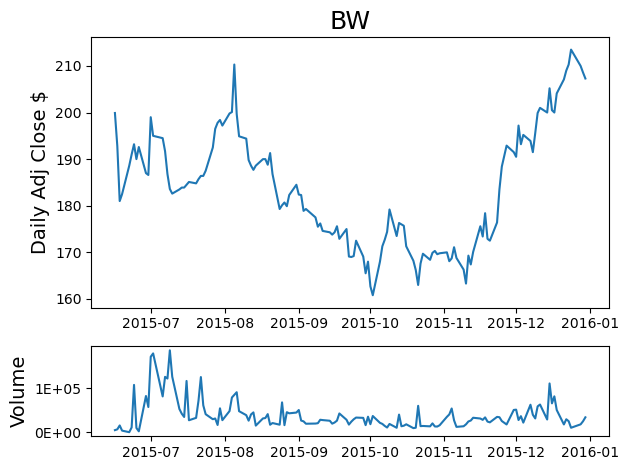

NK: No timezone found, symbol may be delisted


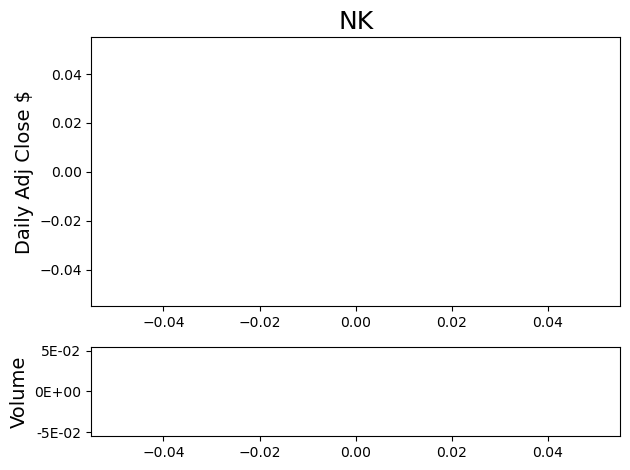

PUB: No timezone found, symbol may be delisted


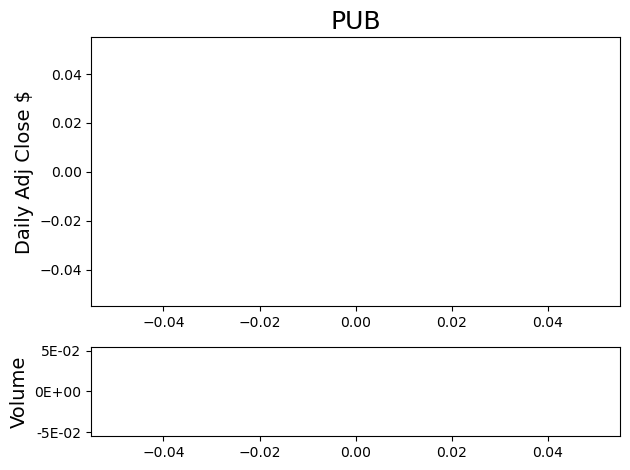

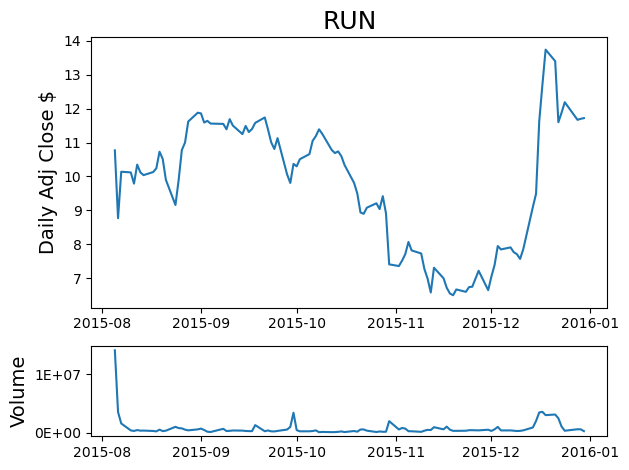

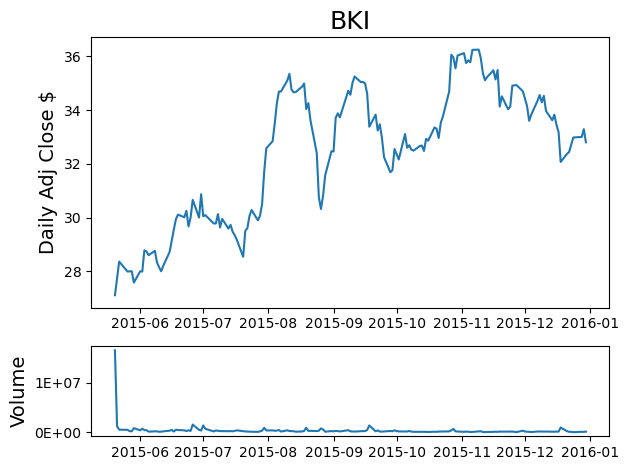

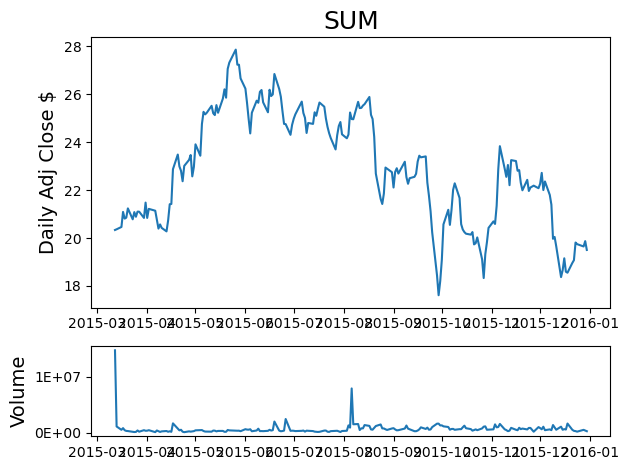

JP: No timezone found, symbol may be delisted


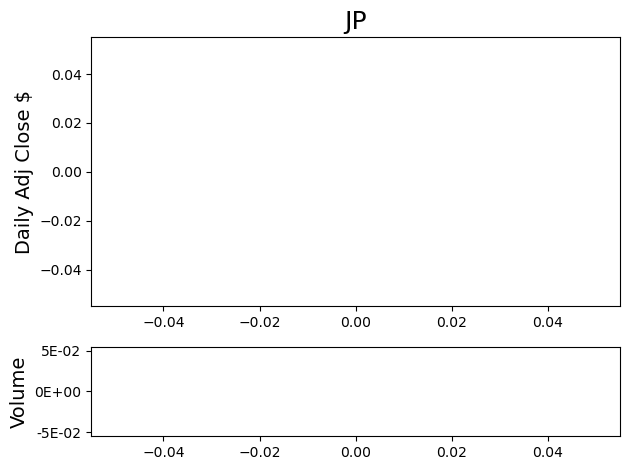

JAX: No timezone found, symbol may be delisted


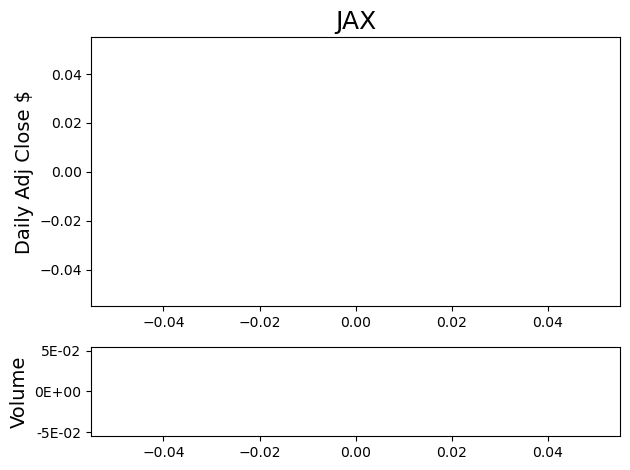

OPNT: No timezone found, symbol may be delisted


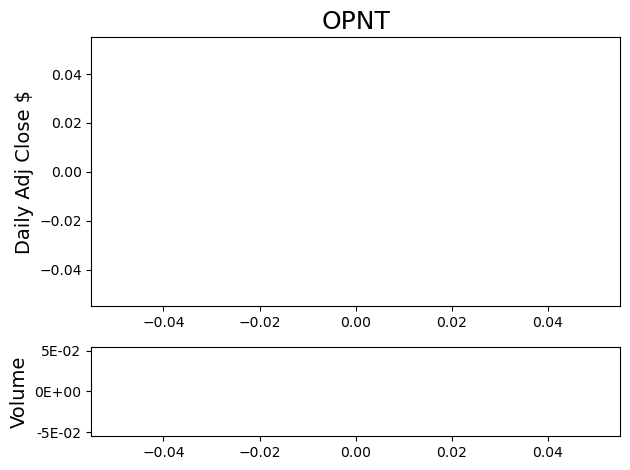

AMRH: No timezone found, symbol may be delisted


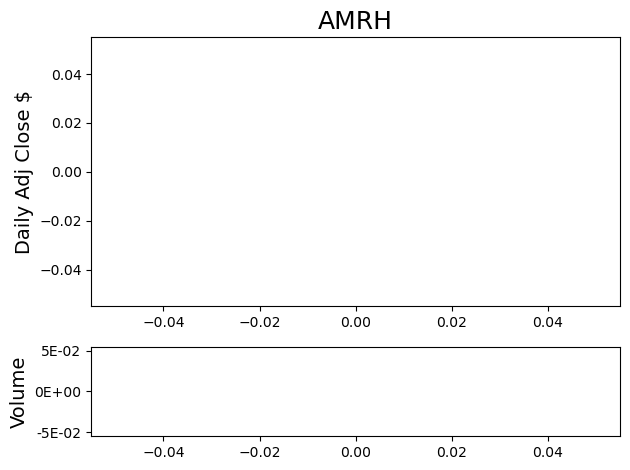

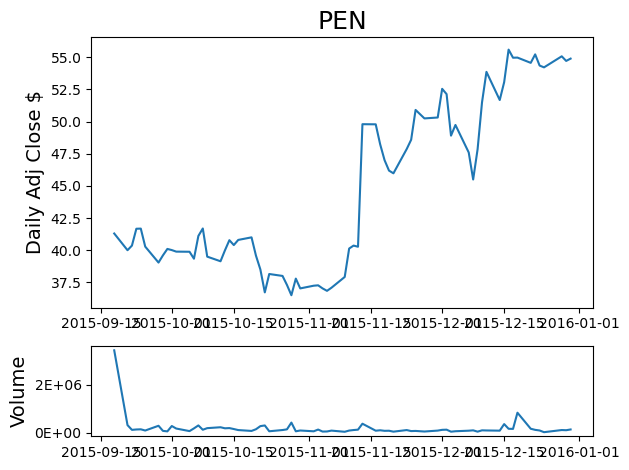

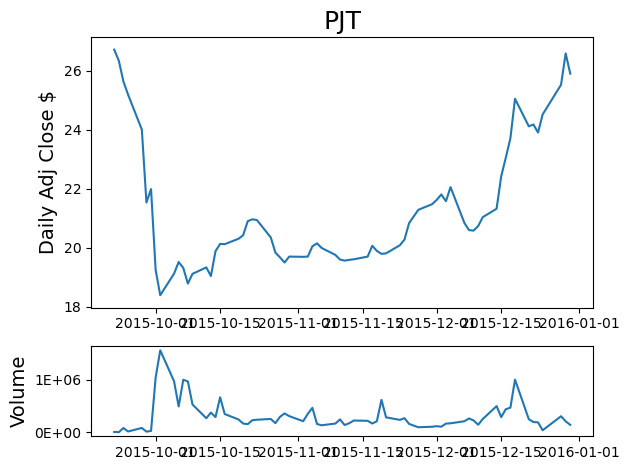

FSB: No timezone found, symbol may be delisted


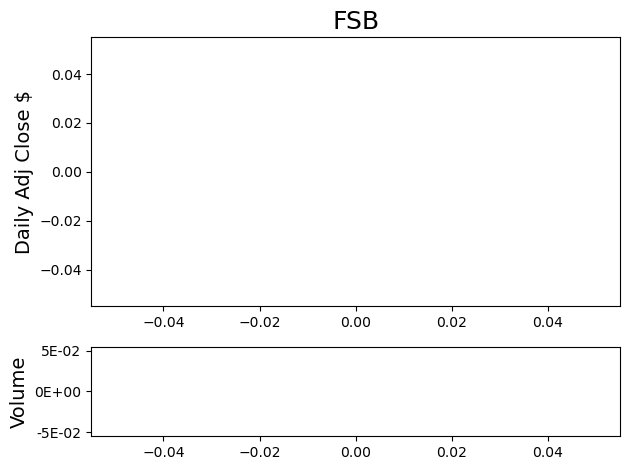

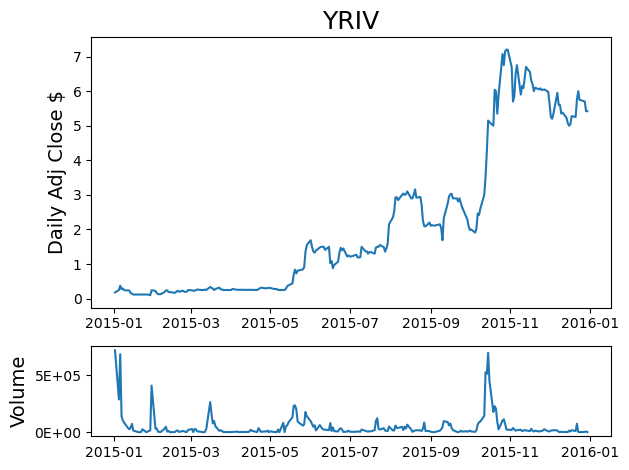

LBCC: No timezone found, symbol may be delisted


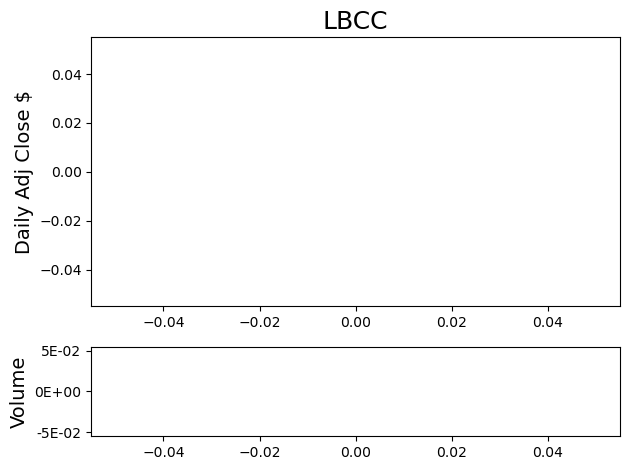

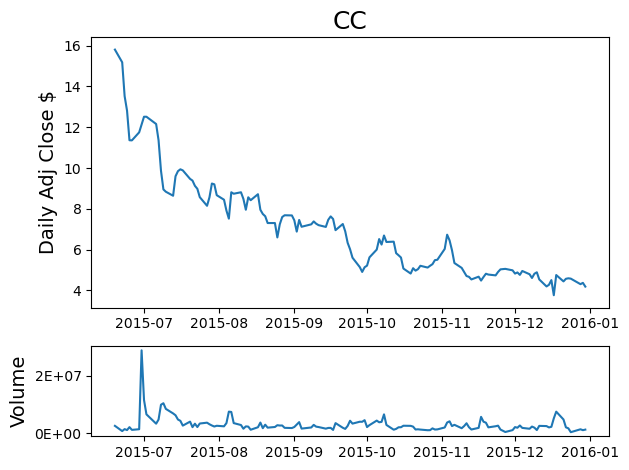

GBT: No timezone found, symbol may be delisted


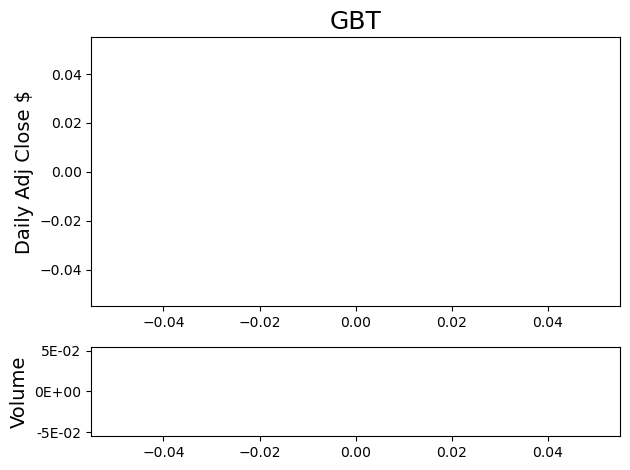

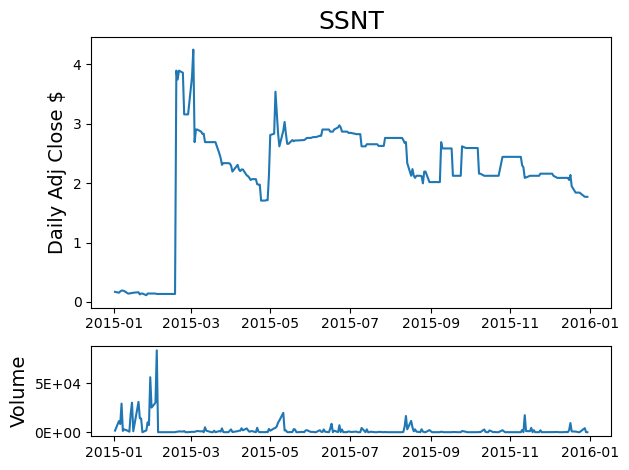

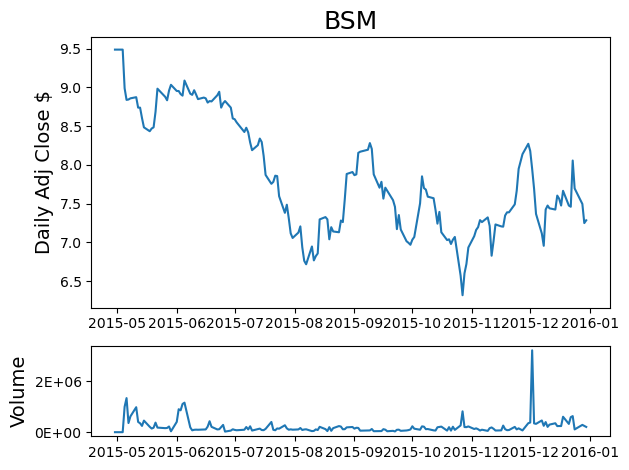

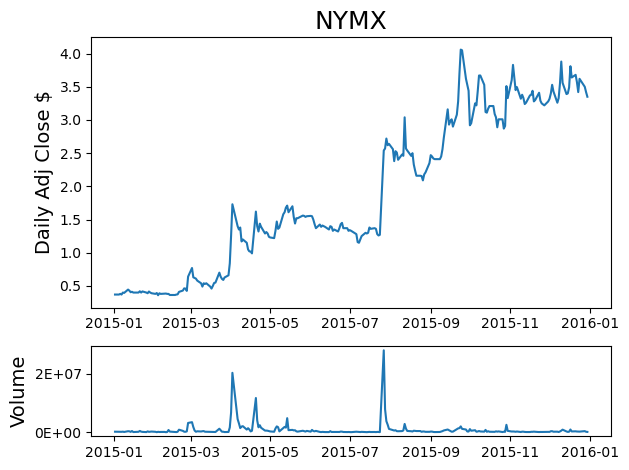

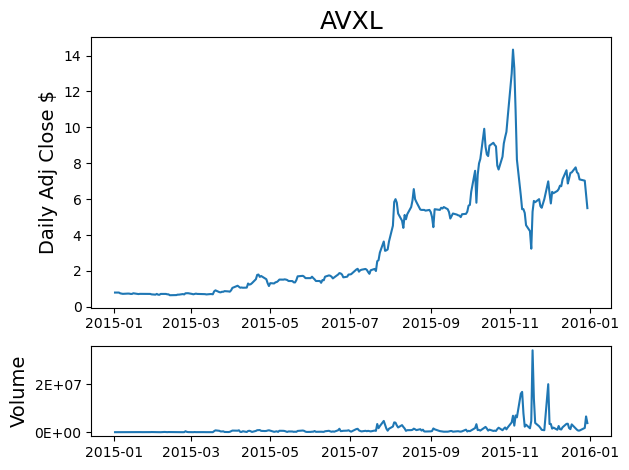

In [11]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2015 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2015 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '2015-01-01'
date_end = '2015-12-31'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    
    # Pull daily prices for each ticker from Yahoo Finance
    yf_ticker = yf.Ticker(ticker)
    daily_price = yf_ticker.history(start=date_start, end=date_end)
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Close'])  # Use 'Close' instead of 'Adj Close'
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

In [12]:
# Drop those stocks with inorganic gains
inorganic_stocks = tickers[:-2] # all except last 2
df.drop(inorganic_stocks, axis=0, inplace=True)

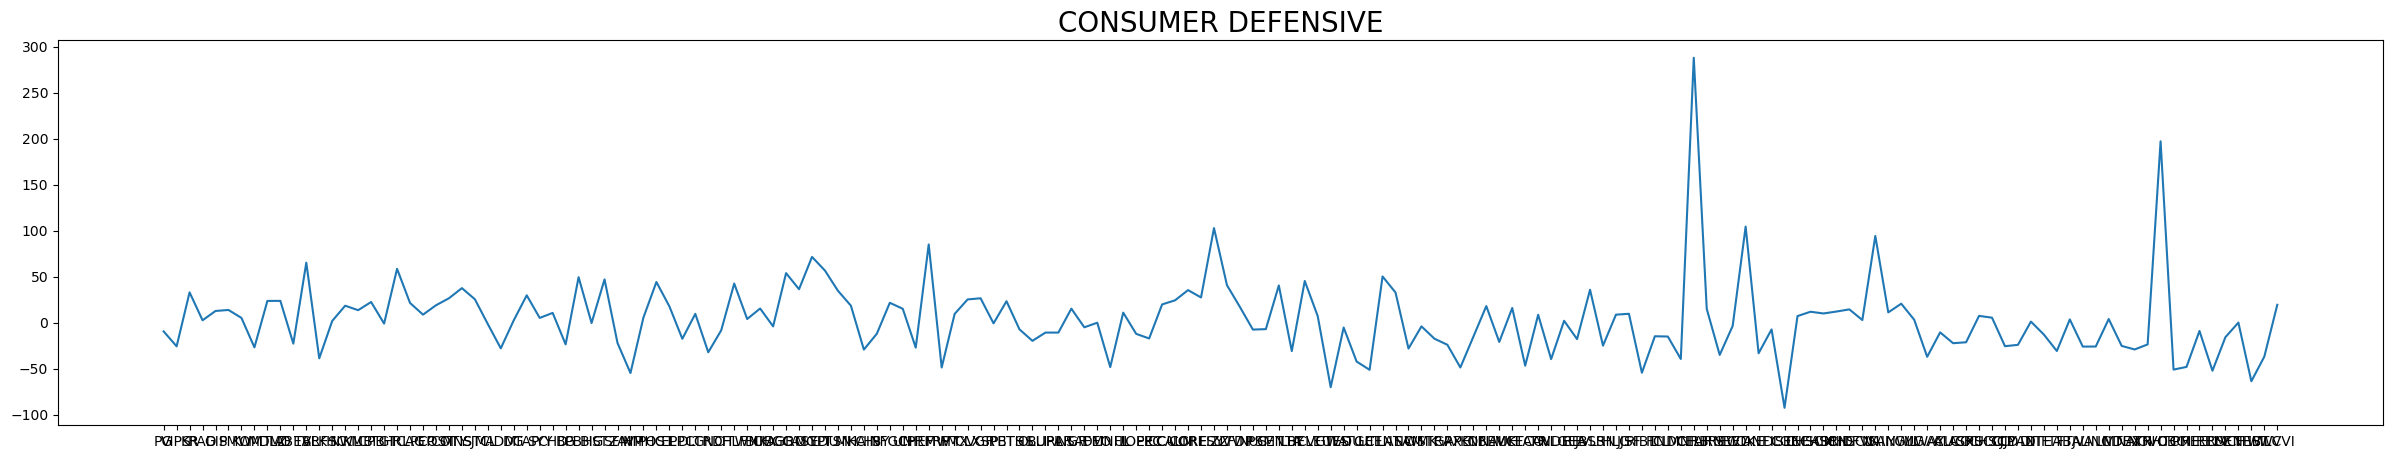

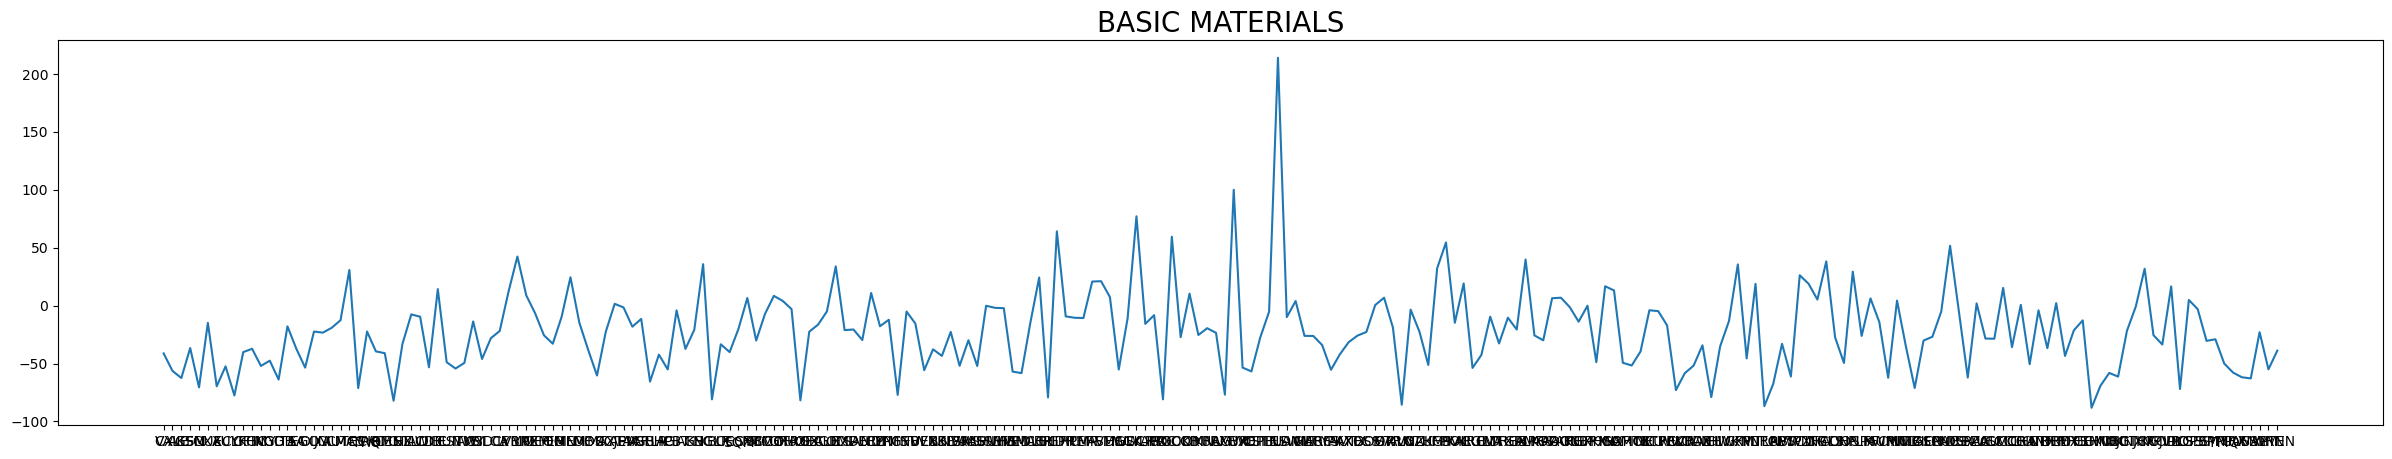

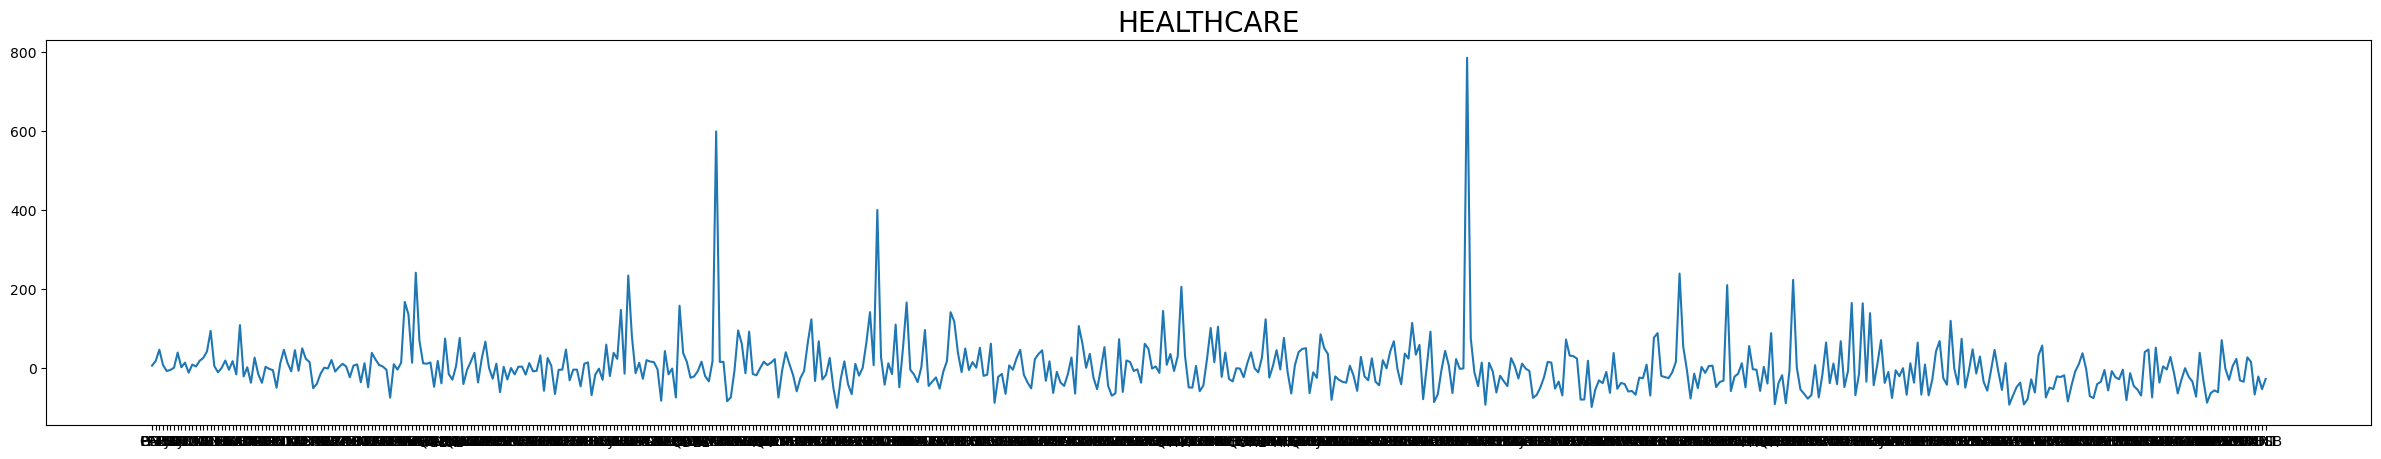

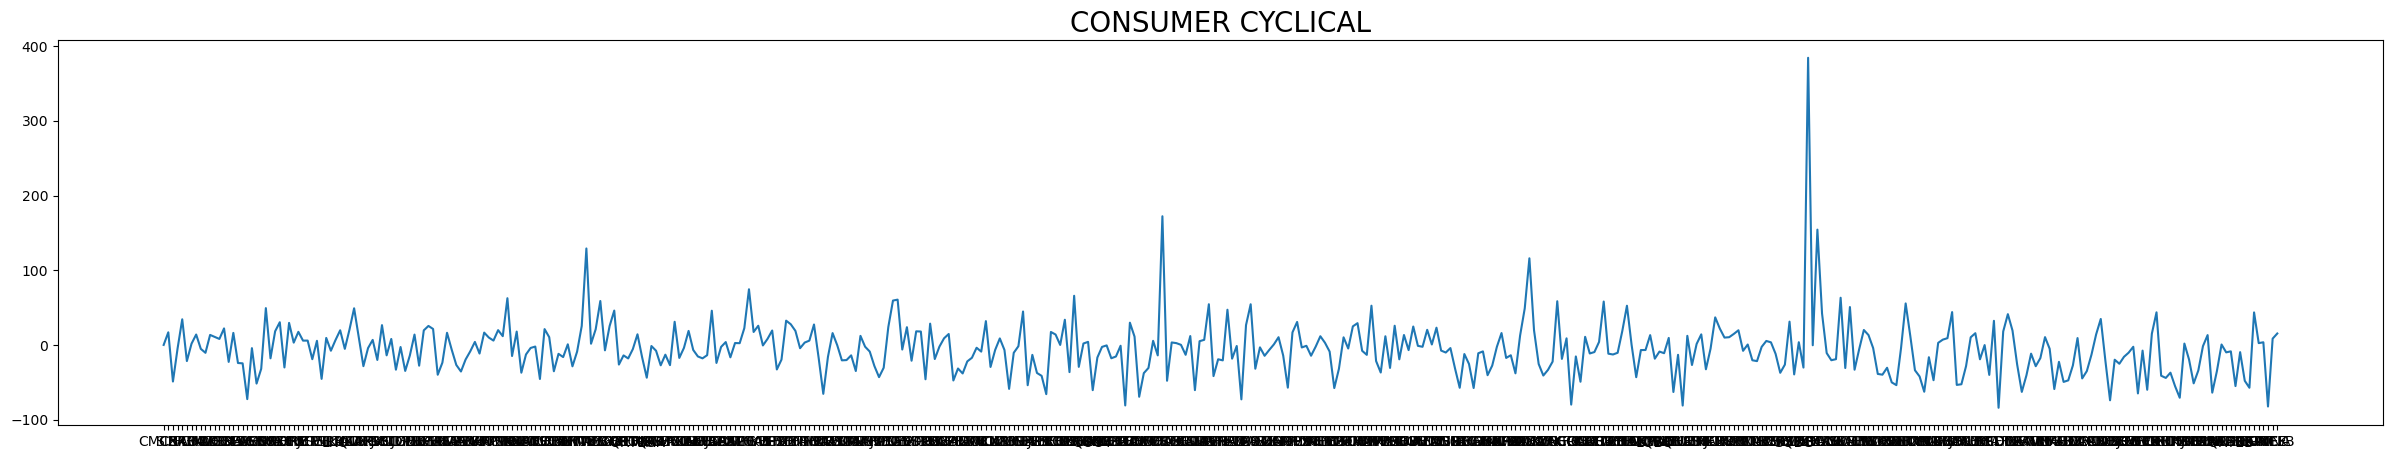

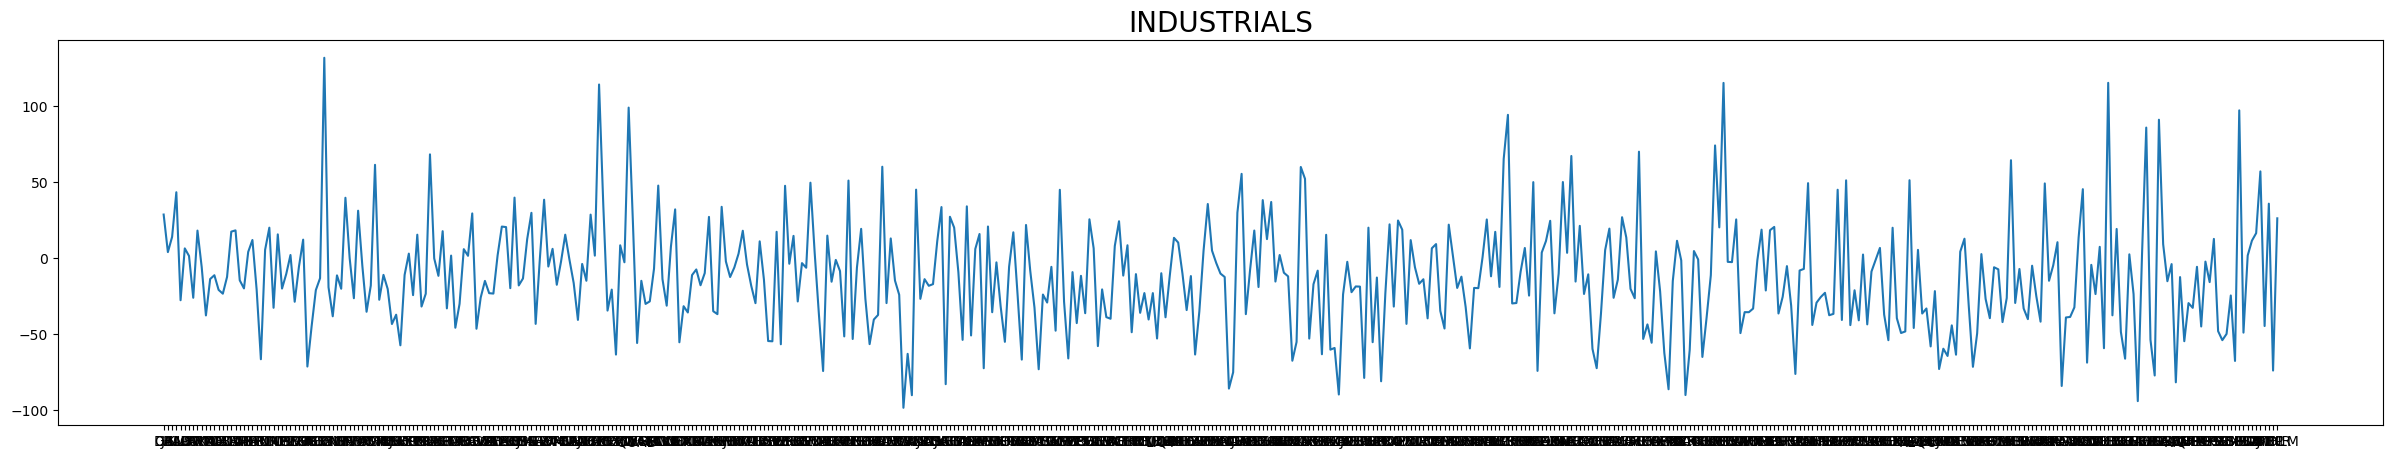

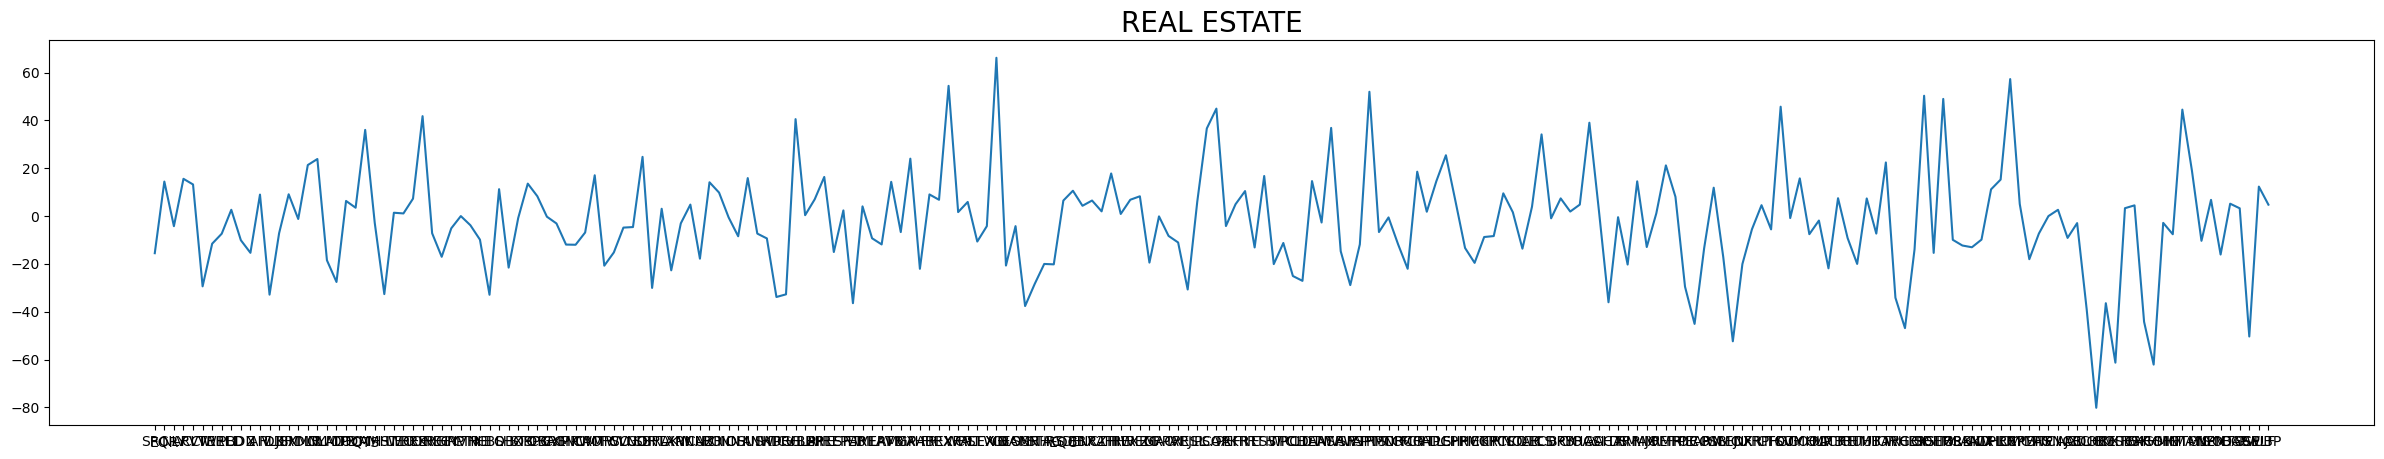

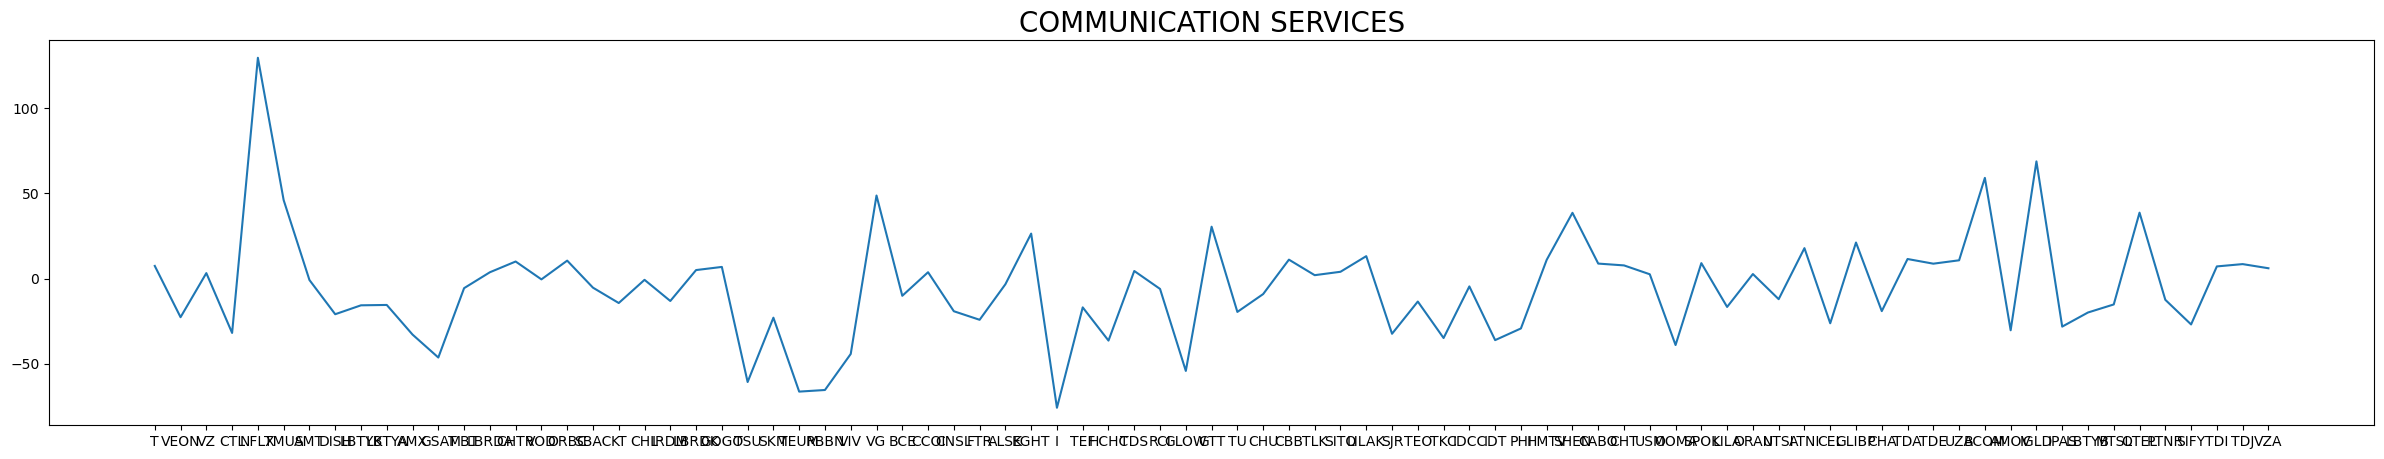

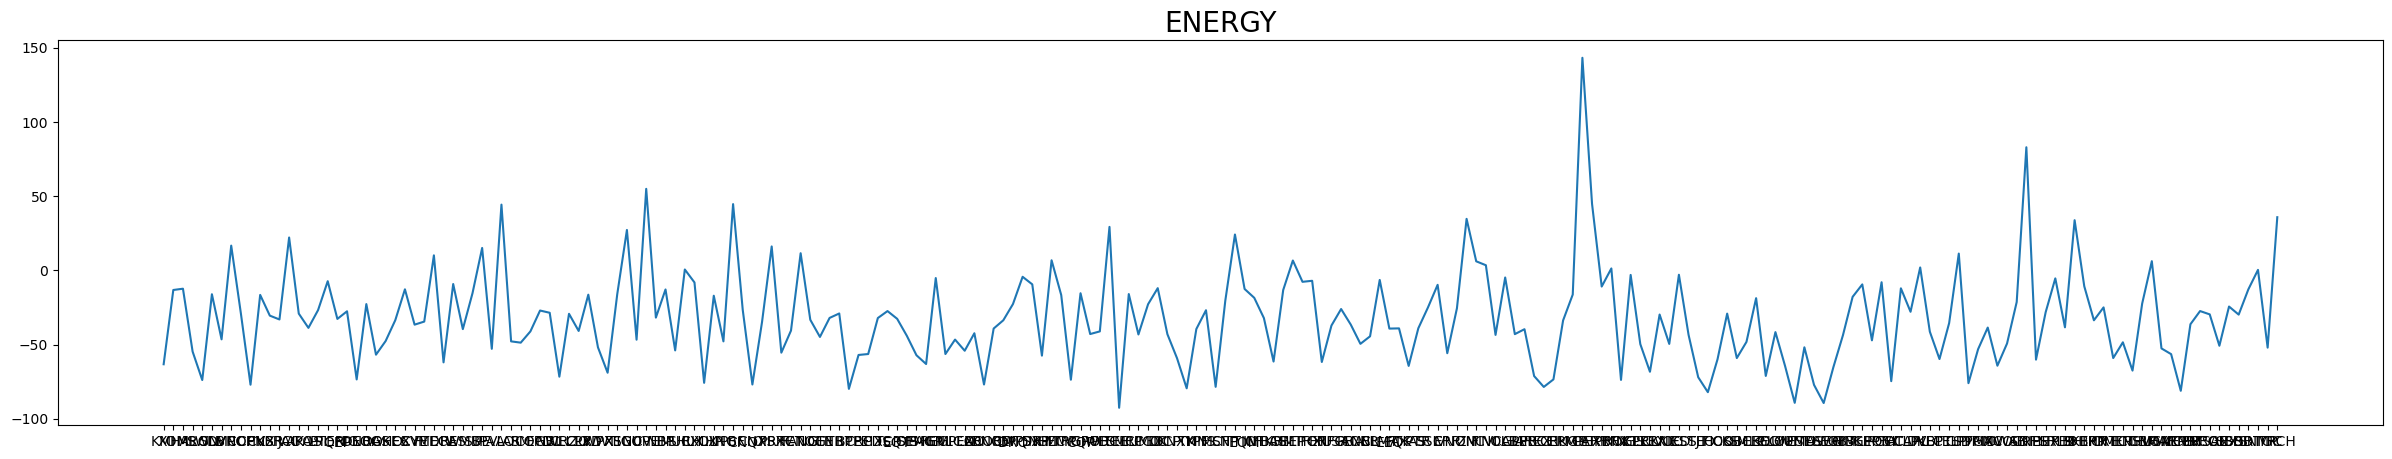

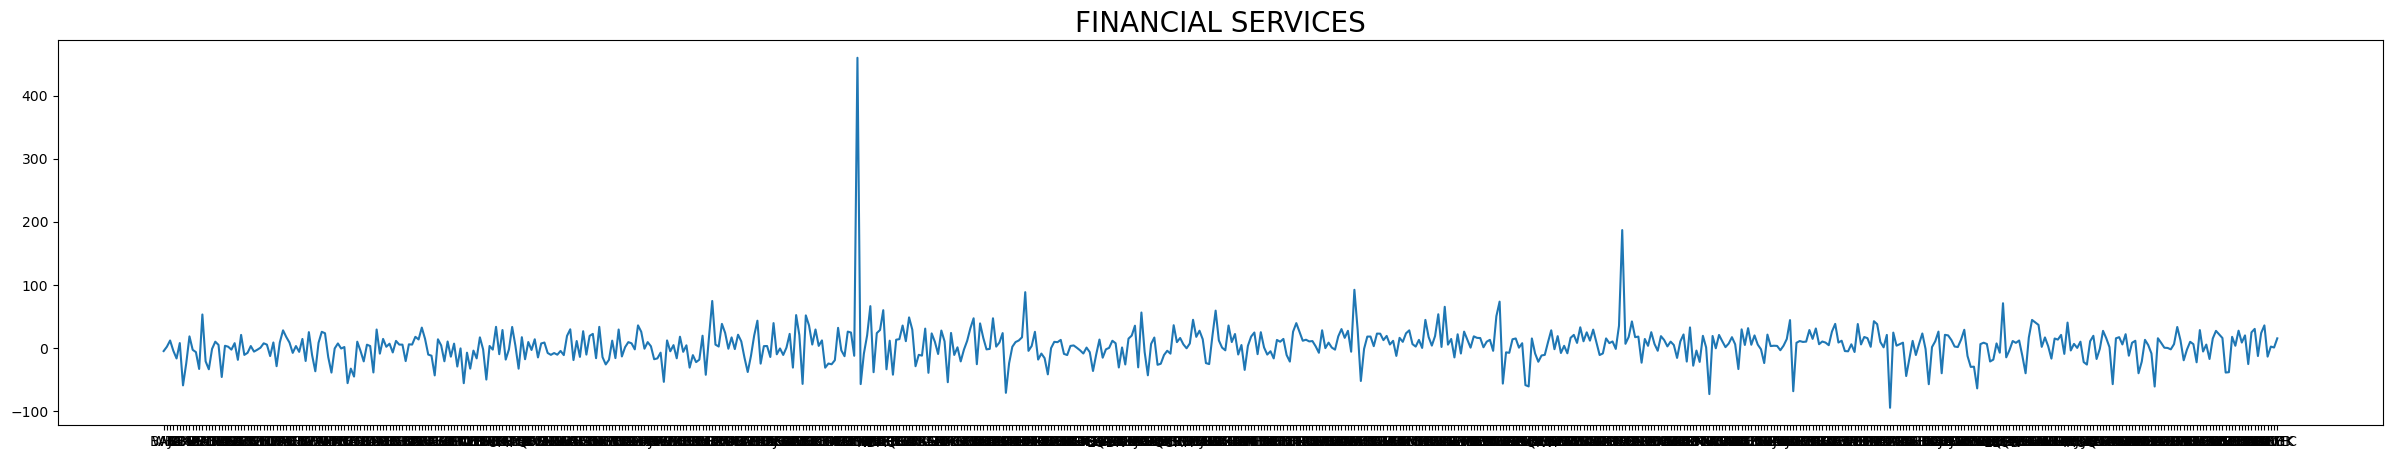

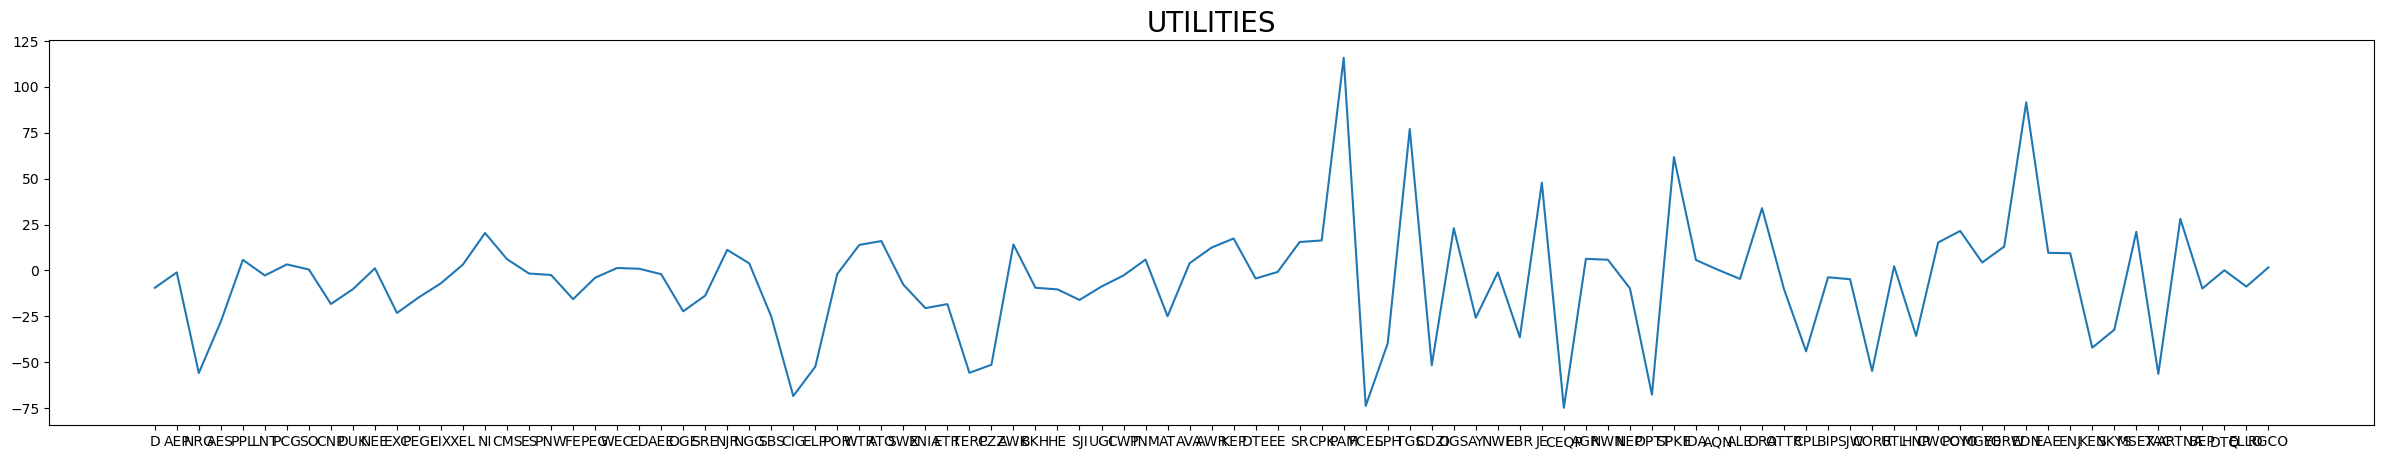

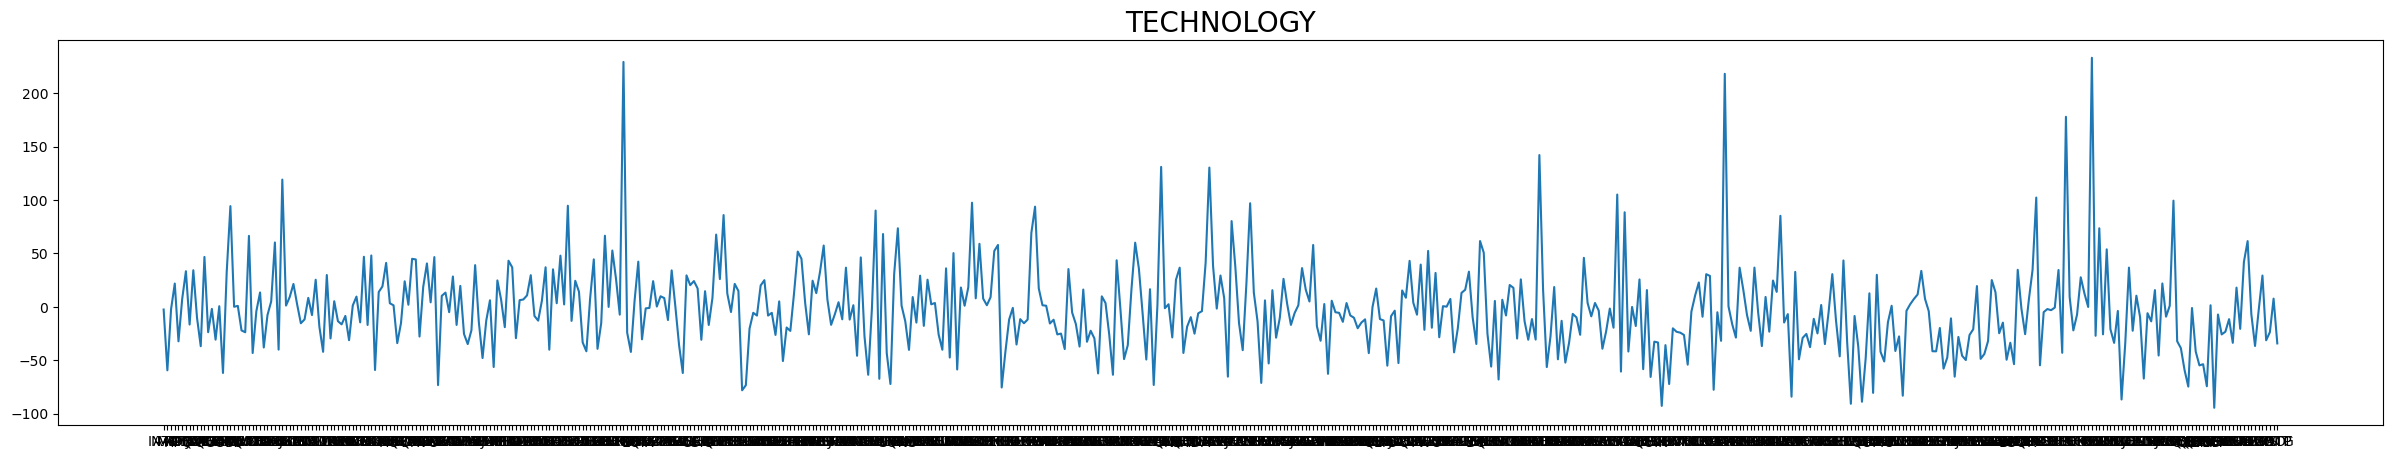

In [13]:
# Check again for gain-outliers
df_ = df.loc[:, ['Sector', '2015 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

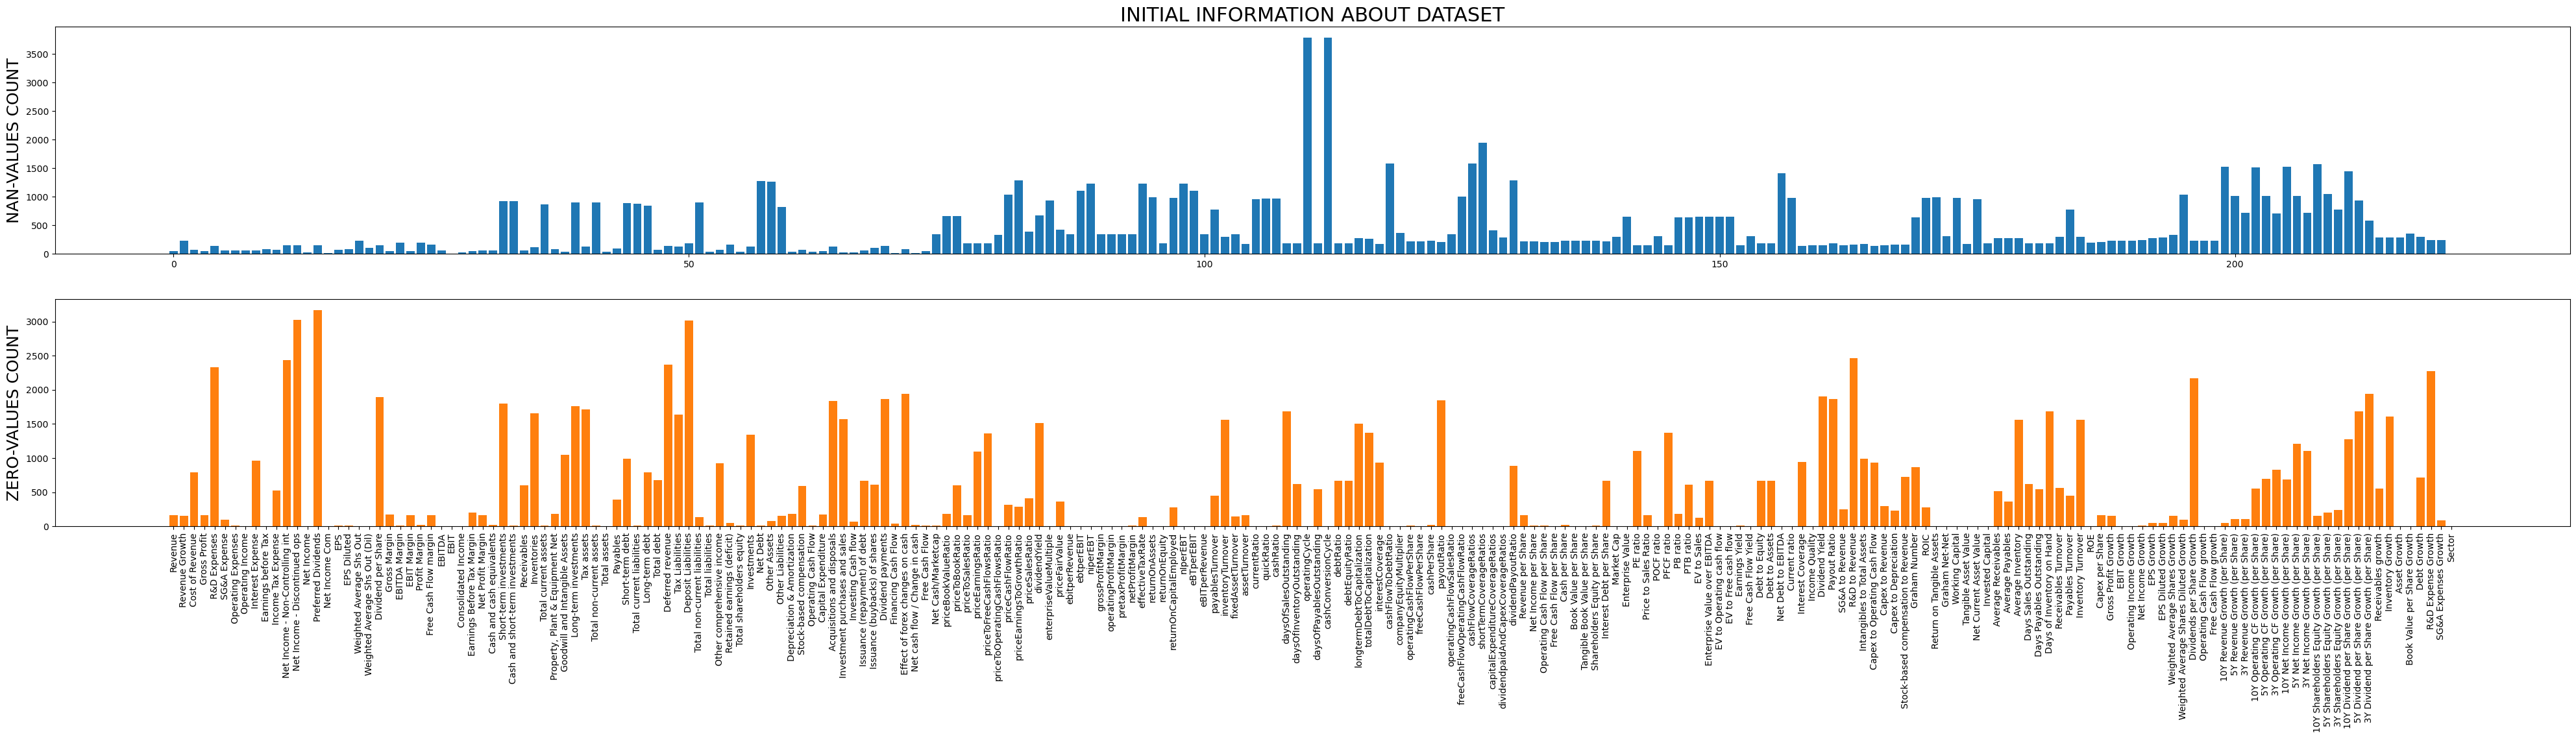

In [14]:
#Drop columns relative to classification, we will use them later
class_data= df.loc[:,['Class','2015 PRICE VAR [%]']]
df.drop(['Class','2015 PRICE VAR [%]'], inplace=True, axis=1)
#Plot initial status of data quality in terms of non-values and zero-values
nan_vals= df.isna().sum()
zero_vals=df.isin([0]).sum()
ind= np.arange(df.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET',fontsize=22)
plt.bar(ind,nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT',fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind,zero_vals.values.tolist())
plt.bar(ind,zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT',fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation=90)
plt.show()

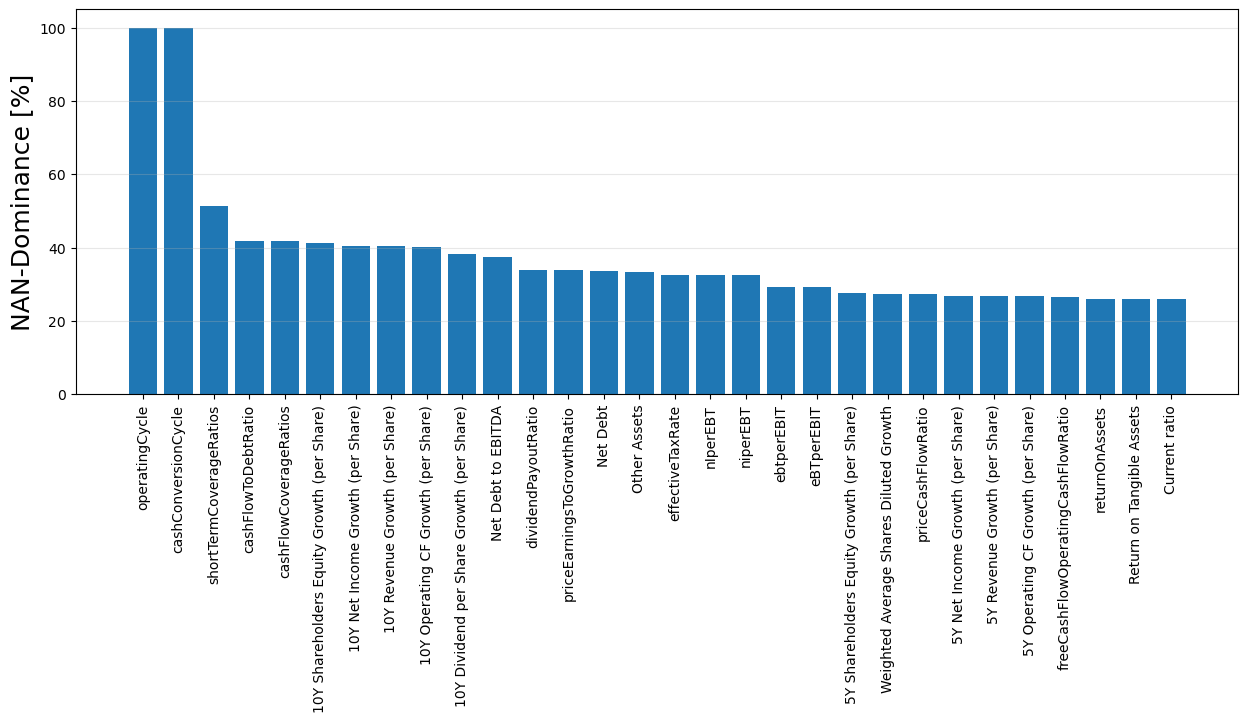

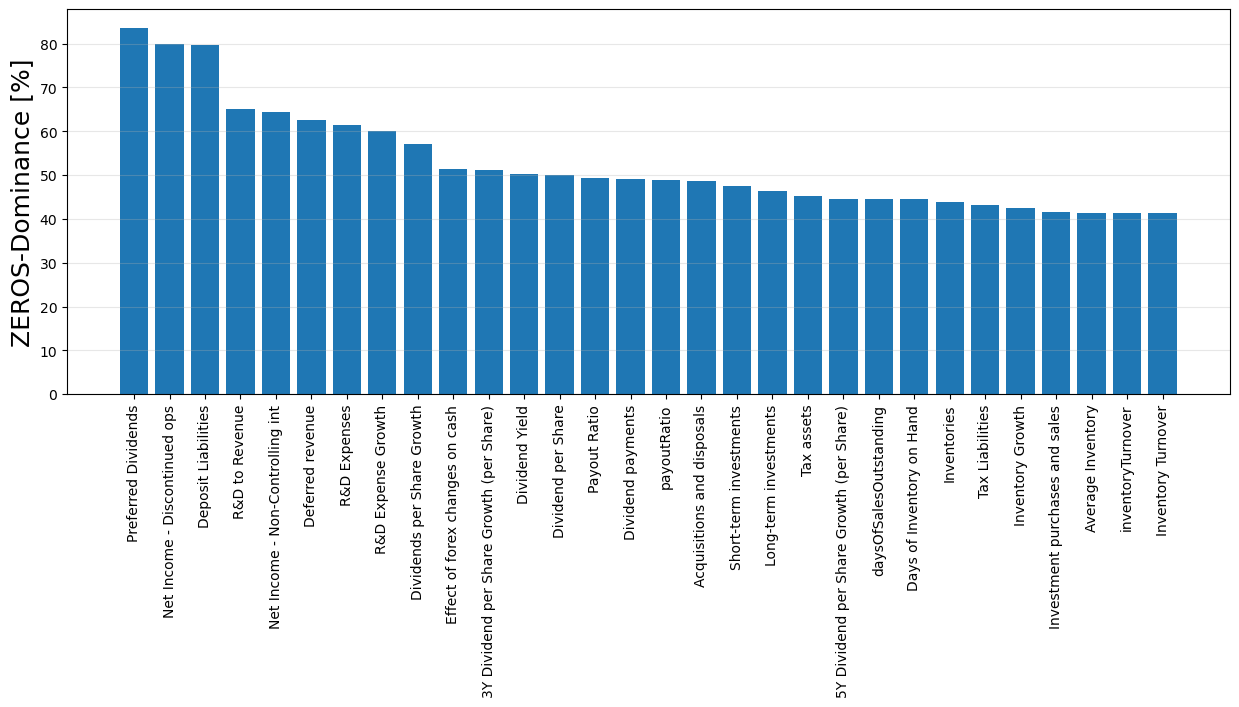

In [15]:
# Find count and percent of nan-values, zero-values
total_nans= df.isnull().sum().sort_values(ascending=False)
percent_nans= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
total_zeros= df.isin([0]).sum().sort_values(ascending=False)
percent_zeros= (df.isin([0]).sum()/df.isin([0]).count()*100).sort_values(ascending=False)
df_nans= pd.concat([total_nans,percent_nans],axis=1,keys=['Total NaN', 'Percent NaN'])
df_zeros= pd.concat([total_zeros, percent_zeros],axis=1,keys=['Total Zeros', 'Percent Zeros'])

#Graphical Representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30),df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30),df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30),df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(),rotation='90')
plt.ylabel('ZEROS-Dominance [%]',fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [17]:
#Find reasonable threshold for nan-values situation 
test_nan_level= 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan= df_nans.quantile(test_nan_level)

#Find reasonable threshold for zero-values situation 
test_zeros_level= 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros= df_zeros.quantile(test_zeros_level)

Total NaN      226.000000
Percent NaN      5.966209
Name: 0.5, dtype: float64
Total Zeros      283.000000
Percent Zeros      7.470961
Name: 0.6, dtype: float64


In [18]:
#Clean the dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

df_test1=df.drop((df_nans[df_nans['Percent NaN']>thresh_nan]).index,1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%:{df_test1.shape[1]}')
print()
      
df_zeros_postnan= df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2= df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros']> thresh_zeros]).index,1)
print(f"NUMBER OF VARIBLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}")     

INITIAL NUMBER OF VARIABLES: 222

NUMBER OF VARIABLES AFTER NaN THRESHOLD 5.97%:113

NUMBER OF VARIBLES AFTER Zeros THRESHOLD 7.47%: 62


C:\Users\Hp\AppData\Local\Temp\ipykernel_3288\1095978564.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test1=df.drop((df_nans[df_nans['Percent NaN']>thresh_nan]).index,1)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3288\1095978564.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test2= df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros']> thresh_zeros]).index,1)


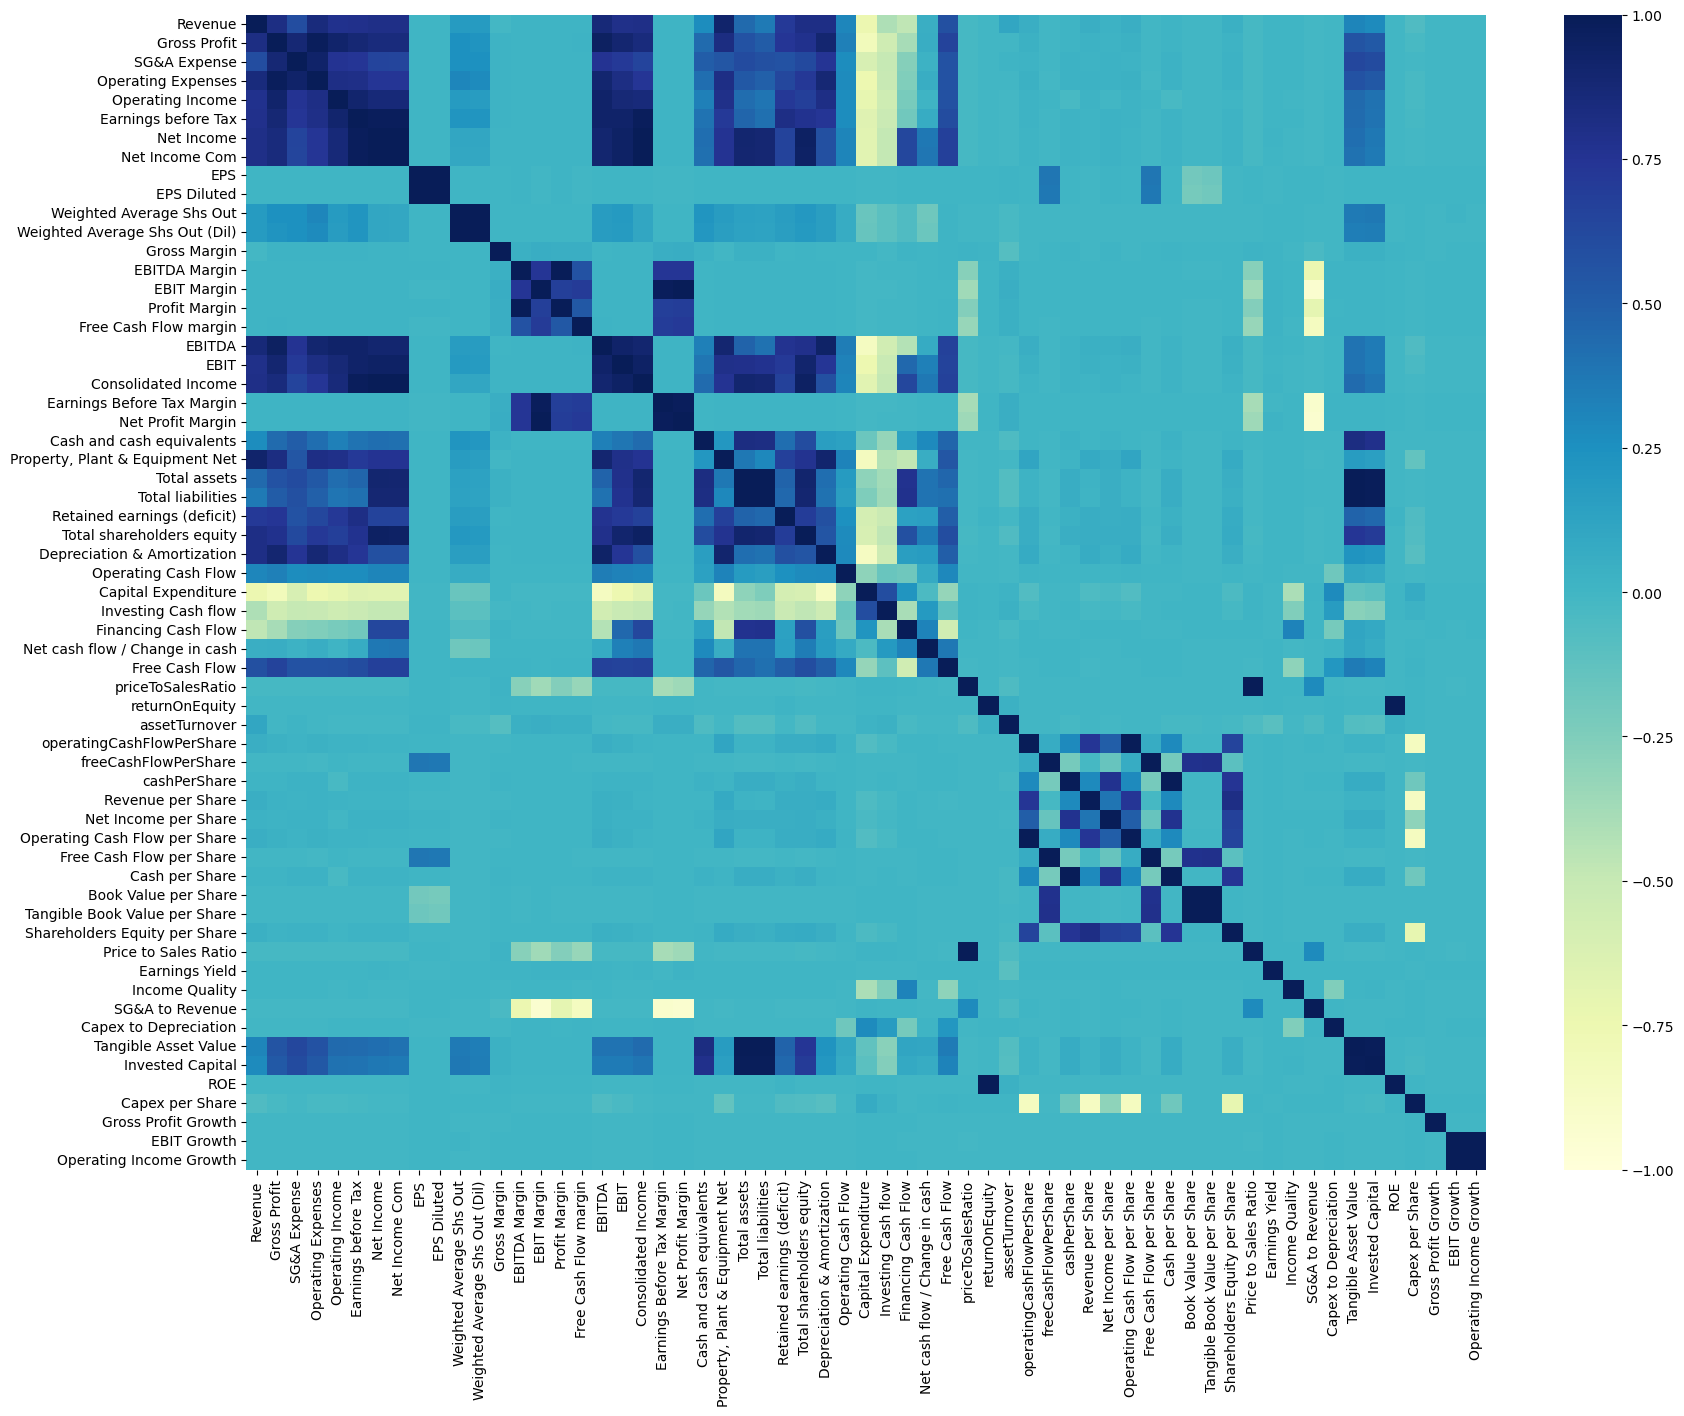

In [19]:
#Plot the correlation matrix
fig, ax= plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

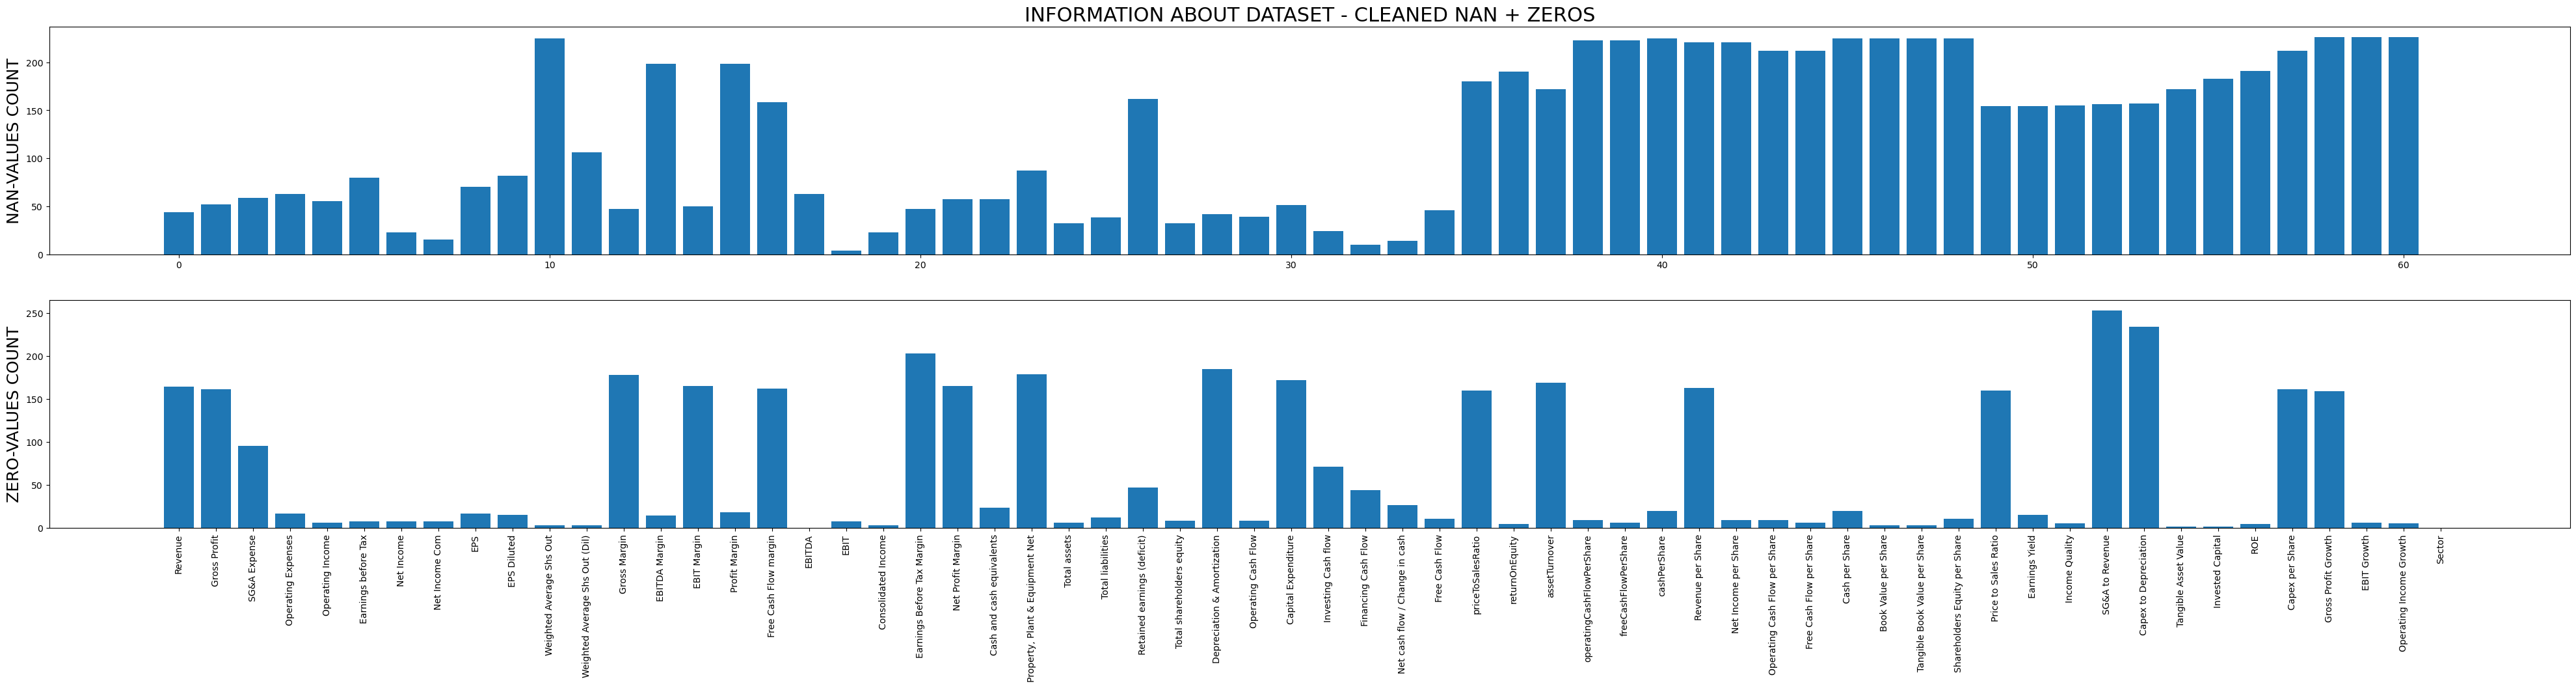

In [20]:
#New check on the nan values
plt.figure(figsize=(50,10))
plt.subplot(2,1,1)
plt.title('INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=22)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isnull().sum())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isin([0]).sum())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(np.arange(df_test2.shape[1]), df_test2.columns.values, rotation='90')
plt.show()

In [21]:
#Analyze Dataframe
df_test2.describe()

Revenue  Gross Profit  SG&A Expense  Operating Expenses  \
count  3.744000e+03  3.736000e+03  3.729000e+03        3.725000e+03   
mean   5.907258e+09  2.198856e+09  9.351015e+08        1.444955e+09   
std    3.911946e+10  1.162032e+10  4.833454e+09        7.324145e+09   
min   -6.276160e+08 -1.105000e+09  0.000000e+00       -1.088448e+09   
25%    5.851275e+07  3.125250e+07  1.557000e+07        3.132300e+07   
50%    4.409500e+08  1.915940e+08  7.459900e+07        1.389520e+08   
75%    2.402177e+09  9.014335e+08  3.519930e+08        5.914230e+08   
max    1.824698e+12  4.621600e+11  1.856830e+11        3.056050e+11   

       Operating Income  Earnings before Tax    Net Income  Net Income Com  \
count      3.733000e+03         3.708000e+03  3.765000e+03    3.773000e+03   
mean       6.782507e+08         5.755311e+08  4.919235e+08    4.863643e+08   
std        3.796121e+09         2.800962e+09  4.408218e+09    4.403774e+09   
min       -6.786000e+09        -8.878000e+09 -8.360000e+09   -8.360000e+09   
25%       -1.211000e+06        -3.657236e+06 -3.654314e+06   -4.357820e+06   
50%        4.232300e+07         2.871000e+07  2.276500e+07    2.175600e+07   
75%        2.744000e+08         2.208995e+08  1.672160e+08    1.639940e+08   
max        1.565540e+11         8.720500e+10  2.339970e+11    2.339970e+11   

                EPS   EPS Diluted  ...  Income Quality  SG&A to Revenue  \
count  3.718000e+03  3.706000e+03  ...     3633.000000      3632.000000   
mean  -2.619988e+04 -2.666363e+04  ...        2.436774         2.010552   
std    1.676680e+06  1.677733e+06  ...       55.154671        34.218508   
min   -1.018709e+08 -1.018709e+08  ...     -724.812500        -1.293500   
25%   -2.300000e-01 -2.318000e-01  ...        0.482600         0.092750   
50%    7.800000e-01  7.658500e-01  ...        1.257400         0.222650   
75%    2.030000e+00  2.000000e+00  ...        2.105900         0.459875   
max    8.028004e+06  6.624003e+06  ...     2086.250000      1540.600000   

       Capex to Depreciation  Tangible Asset Value  Invested Capital  \
count            3631.000000          3.616000e+03      3.605000e+03   
mean               -0.434208          1.765034e+10      1.943243e+10   
std               660.081293          1.217026e+11      1.380249e+11   
min            -16522.069800         -2.101300e+09     -1.240000e+09   
25%                -1.667650          1.641032e+08      8.502888e+07   
50%                -0.918300          8.515255e+08      7.897350e+08   
75%                -0.448800          3.905753e+09      4.200100e+09   
max             35298.333300          2.515999e+12      3.052798e+12   

                ROE  Capex per Share  Gross Profit Growth   EBIT Growth  \
count  3.597000e+03     3.576000e+03          3562.000000   3562.000000   
mean   1.951294e+03    -1.522512e+04            95.737643      3.650122   
std    1.170282e+05     3.863478e+05          5642.676812    228.490653   
min   -7.101360e+01    -1.402752e+07           -48.793100  -1119.284200   
25%   -2.060000e-02    -1.805825e+00            -0.010275     -0.268975   
50%    7.800000e-02    -4.848500e-01             0.072200      0.065950   
75%    1.531000e-01    -9.762500e-02             0.225175      0.404500   
max    7.018763e+06     1.255873e+06        336767.800000  13562.153200   

       Operating Income Growth  
count              3562.000000  
mean                  3.872690  
std                 227.593745  
min                -487.340900  
25%                  -0.253725  
50%                   0.061200  
75%                   0.353200  
max               13545.338700  

[8 rows x 61 columns]

In [28]:
#Cut outliers
top_quantiles= df_test2.quantile(0.97)
outliers_top= (df_test2>top_quantiles)

low_quantiles= df_test2.quantile(0.03)
outliers_low= (df_test2 < low_quantiles)

df_test2= df_test2.mask(outliers_top, top_quantiles,axis=1)

#Take a look at the dataframe post-outliers cut
df_test2.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_3288\1703093493.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_top= (df_test2>top_quantiles)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3288\1703093493.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_low= (df_test2 < low_quantiles)


Revenue  Gross Profit  SG&A Expense  Operating Expenses  \
count  3.744000e+03  3.736000e+03  3.729000e+03        3.725000e+03   
mean   3.650185e+09  1.384953e+09  5.740336e+08        9.153318e+08   
std    8.339294e+09  3.209738e+09  1.365572e+09        2.146747e+09   
min   -6.276160e+08 -1.105000e+09  0.000000e+00       -1.088448e+09   
25%    5.851275e+07  3.125250e+07  1.557000e+07        3.132300e+07   
50%    4.409500e+08  1.915940e+08  7.459900e+07        1.389520e+08   
75%    2.402177e+09  9.014335e+08  3.519930e+08        5.914230e+08   
max    3.991236e+10  1.537495e+10  6.623942e+09        1.052921e+10   

       Operating Income  Earnings before Tax    Net Income  Net Income Com  \
count      3.733000e+03         3.708000e+03  3.765000e+03    3.773000e+03   
mean       4.142632e+08         3.534023e+08  2.570397e+08    2.513430e+08   
std        1.046957e+09         9.579635e+08  7.440451e+08    7.425796e+08   
min       -6.786000e+09        -8.878000e+09 -8.360000e+09   -8.360000e+09   
25%       -1.211000e+06        -3.657236e+06 -3.654314e+06   -4.357820e+06   
50%        4.232300e+07         2.871000e+07  2.276500e+07    2.175600e+07   
75%        2.744000e+08         2.208995e+08  1.672160e+08    1.639940e+08   
max        4.701240e+09         4.176913e+09  3.165899e+09    3.126310e+09   

                EPS   EPS Diluted  ...  Income Quality  SG&A to Revenue  \
count  3.718000e+03  3.706000e+03  ...     3633.000000      3632.000000   
mean  -2.836079e+04 -2.845267e+04  ...        0.294175         0.402618   
std    1.671466e+06  1.674170e+06  ...       19.951351         0.639650   
min   -1.018709e+08 -1.018709e+08  ...     -724.812500        -1.293500   
25%   -2.300000e-01 -2.318000e-01  ...        0.482600         0.092750   
50%    7.800000e-01  7.658500e-01  ...        1.257400         0.222650   
75%    2.030000e+00  2.000000e+00  ...        2.105900         0.459875   
max    7.464900e+00  7.317000e+00  ...        9.176300         3.407325   

       Capex to Depreciation  Tangible Asset Value  Invested Capital  \
count            3631.000000          3.616000e+03      3.605000e+03   
mean              -10.179487          6.781219e+09      7.157625e+09   
std               303.909045          1.663302e+10      1.749639e+10   
min            -16522.069800         -2.101300e+09     -1.240000e+09   
25%                -1.667650          1.641032e+08      8.502888e+07   
50%                -0.918300          8.515255e+08      7.897350e+08   
75%                -0.448800          3.905753e+09      4.200100e+09   
max                 0.000000          8.235325e+10      8.568560e+10   

               ROE  Capex per Share  Gross Profit Growth  EBIT Growth  \
count  3597.000000     3.576000e+03          3562.000000  3562.000000   
mean     -0.114056    -1.557655e+04             0.155892    -0.771381   
std       2.091084     3.857624e+05             1.010052    21.763389   
min     -71.013600    -1.402752e+07           -48.793100 -1119.284200   
25%      -0.020600    -1.805825e+00            -0.010275    -0.268975   
50%       0.078000    -4.848500e-01             0.072200     0.065950   
75%       0.153100    -9.762500e-02             0.225175     0.404500   
max       0.760068     0.000000e+00             2.245708     4.226564   

       Operating Income Growth  
count              3562.000000  
mean                 -0.538468  
std                  11.808254  
min                -487.340900  
25%                  -0.253725  
50%                   0.061200  
75%                   0.353200  
max                   3.563666  

[8 rows x 61 columns]

In [31]:
#Replace nan-values with mean value column, considering each sector individually
df_test2= df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

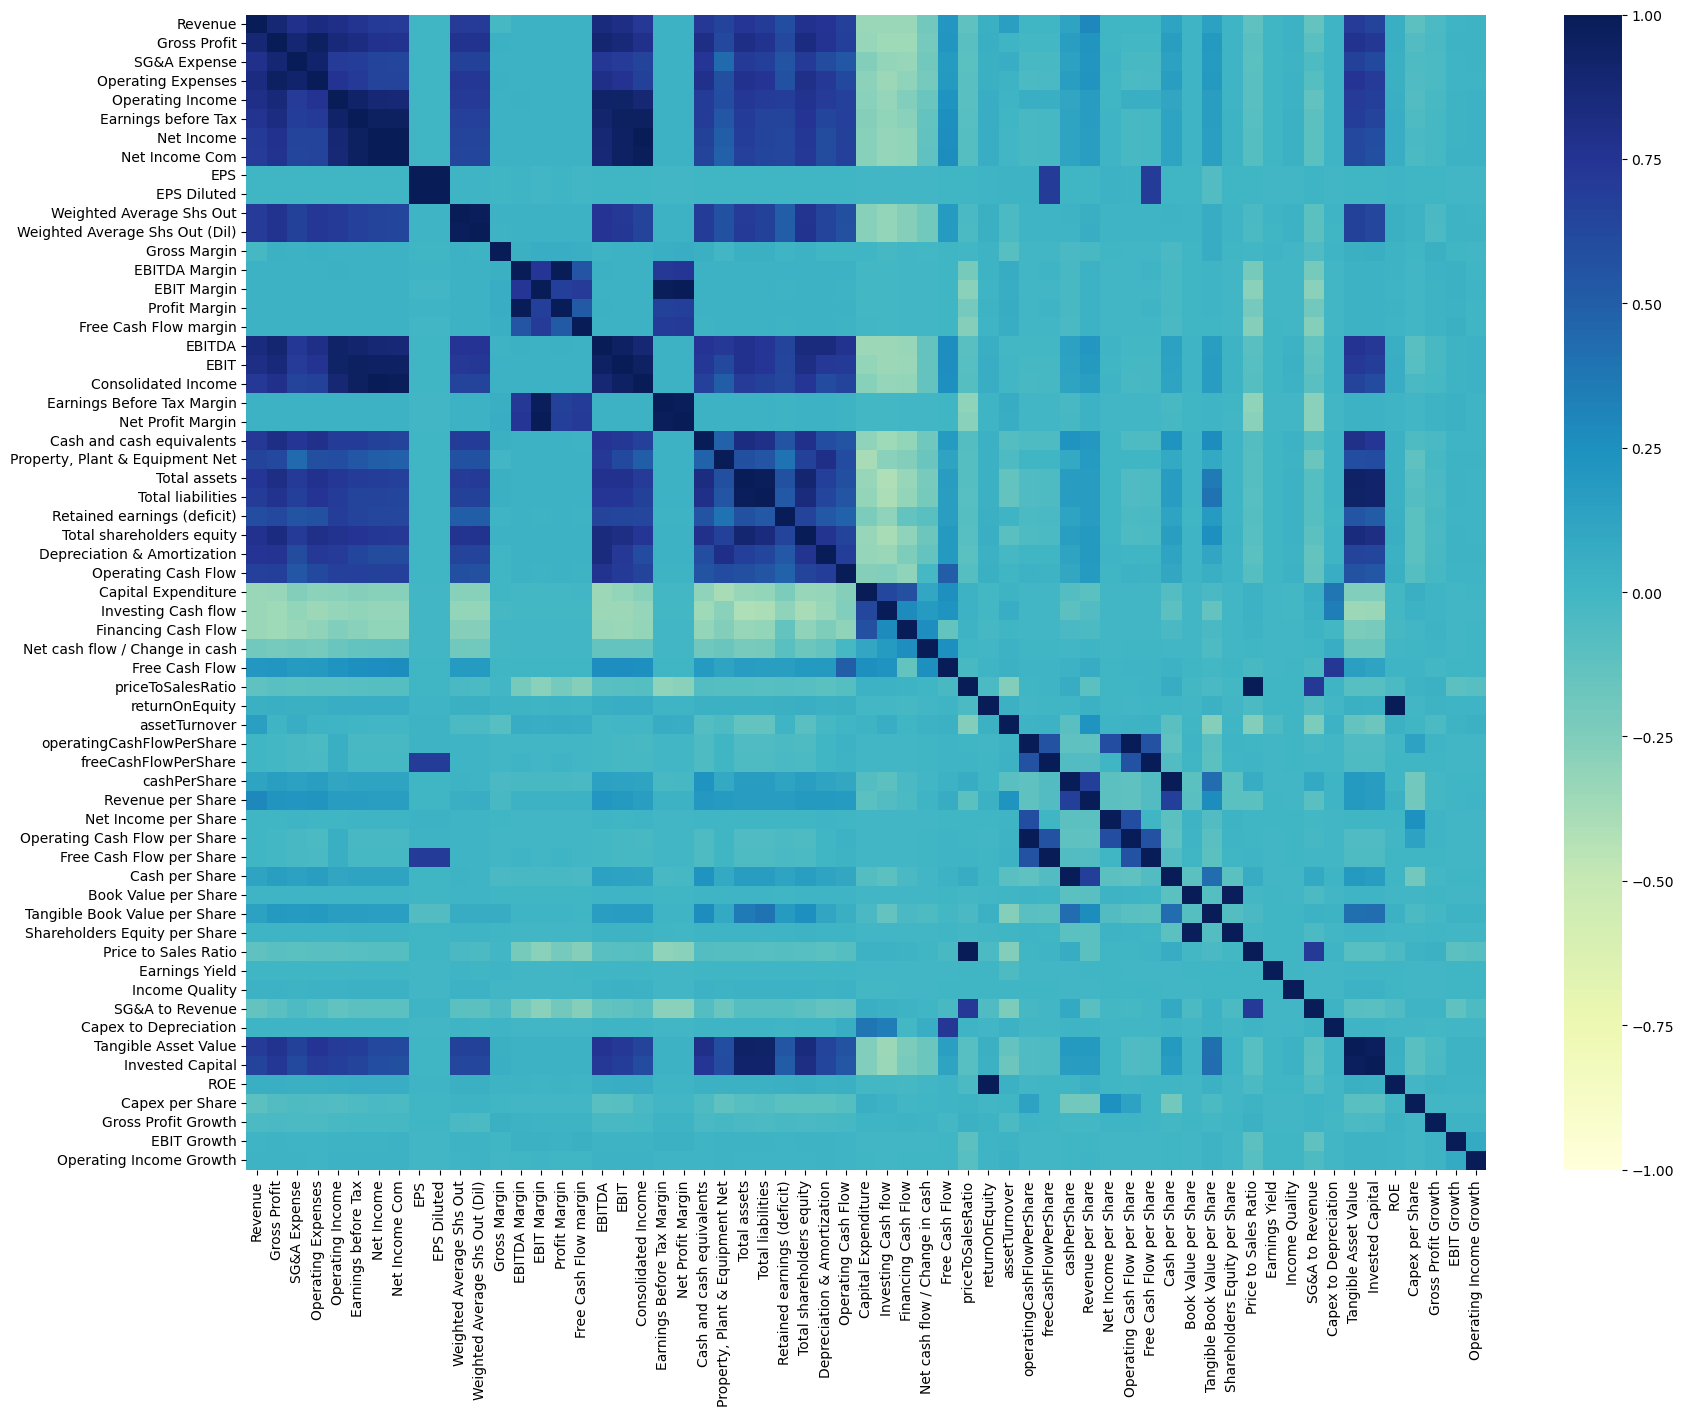

In [39]:
#Plot correlation matrix of output dataset
fig, ax= plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()


In [41]:
#Add sector column
df_out= df_test2.join(df['Sector'])

#Add back the classification columns
df_out= df_out.join(class_data)

#Print information about dataset
df_out.info()
df_out.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, PG to WTT
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Revenue                          3788 non-null   float64
 1   Gross Profit                     3788 non-null   float64
 2   SG&A Expense                     3788 non-null   float64
 3   Operating Expenses               3788 non-null   float64
 4   Operating Income                 3788 non-null   float64
 5   Earnings before Tax              3788 non-null   float64
 6   Net Income                       3788 non-null   float64
 7   Net Income Com                   3788 non-null   float64
 8   EPS                              3788 non-null   float64
 9   EPS Diluted                      3788 non-null   float64
 10  Weighted Average Shs Out         3788 non-null   float64
 11  Weighted Average Shs Out (Dil)   3788 non-null   float64
 12  Gross Margin             

Revenue  Gross Profit  SG&A Expense  Operating Expenses  \
count  3.788000e+03  3.788000e+03  3.788000e+03        3.788000e+03   
mean   3.647819e+09  1.388712e+09  5.766615e+08        9.184062e+08   
std    8.292136e+09  3.189281e+09  1.355686e+09        2.130207e+09   
min   -6.276160e+08 -1.105000e+09  0.000000e+00       -1.088448e+09   
25%    5.986850e+07  3.201302e+07  1.584700e+07        3.197000e+07   
50%    4.640207e+08  2.014670e+08  7.813200e+07        1.453505e+08   
75%    2.517900e+09  9.439630e+08  3.813361e+08        6.215332e+08   
max    3.991236e+10  1.537495e+10  6.623942e+09        1.052921e+10   

       Operating Income  Earnings before Tax    Net Income  Net Income Com  \
count      3.788000e+03         3.788000e+03  3.788000e+03    3.788000e+03   
mean       4.164302e+08         3.557650e+08  2.573170e+08    2.515144e+08   
std        1.039760e+09         9.483844e+08  7.418814e+08    7.411735e+08   
min       -6.786000e+09        -8.878000e+09 -8.360000e+09   -8.360000e+09   
25%       -8.549083e+05        -2.975058e+06 -3.441750e+06   -4.262561e+06   
50%        4.522200e+07         3.185500e+07  2.341350e+07    2.208150e+07   
75%        2.914665e+08         2.468812e+08  1.718065e+08    1.654120e+08   
max        4.701240e+09         4.176913e+09  3.165899e+09    3.126310e+09   

                EPS   EPS Diluted  ...  Capex to Depreciation  \
count  3.788000e+03  3.788000e+03  ...            3788.000000   
mean  -2.813142e+04 -2.813148e+04  ...             -10.134947   
std    1.655961e+06  1.655961e+06  ...             297.596986   
min   -1.018709e+08 -1.018709e+08  ...          -16522.069800   
25%   -2.306000e-01 -2.400000e-01  ...              -1.698075   
50%    7.850000e-01  7.700000e-01  ...              -0.961650   
75%    2.010000e+00  1.972500e+00  ...              -0.465875   
max    7.464900e+00  7.317000e+00  ...               0.000000   

       Tangible Asset Value  Invested Capital          ROE  Capex per Share  \
count          3.788000e+03      3.788000e+03  3788.000000     3.788000e+03   
mean           6.905234e+09      7.291169e+09    -0.110703    -1.601729e+04   
std            1.630362e+10      1.713147e+10     2.038143     3.749660e+05   
min           -2.101300e+09     -1.240000e+09   -71.013600    -1.402752e+07   
25%            1.815445e+08      1.017131e+08    -0.029725    -2.452200e+00   
50%            9.884395e+08      9.339170e+08     0.077350    -5.584500e-01   
75%            4.559991e+09      5.008099e+09     0.145075    -1.147500e-01   
max            8.235325e+10      8.568560e+10     0.760068     0.000000e+00   

       Gross Profit Growth  EBIT Growth  Operating Income Growth        Class  \
count          3788.000000  3788.000000              3788.000000  3788.000000   
mean              0.156258    -0.758249                -0.546642     0.426082   
std               0.979664    21.105661                11.458724     0.494571   
min             -48.793100 -1119.284200              -487.340900     0.000000   
25%              -0.003825    -0.282600                -0.254025     0.000000   
50%               0.080200     0.060500                 0.055000     0.000000   
75%               0.220500     0.366000                 0.319350     1.000000   
max               2.245708     4.226564                 3.563666     1.000000   

       2015 PRICE VAR [%]  
count         3788.000000  
mean            -5.025833  
std             43.177991  
min           -100.397220  
25%            -28.657993  
50%             -5.518745  
75%             12.993969  
max            786.486467  

[8 rows x 63 columns]